<a href="https://colab.research.google.com/github/MahmoudMans/Team3_power_consumption/blob/main/Team3_power_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the power consumption of a building

## 1. Business Understanding

### 1.1 Project description

The city of Seattle is on a mission to become a carbon-neutral metropolis by the year 2050. One of the main contributors to carbon footprints across the city is its non-residential buildings. In alignment with this mission, a dedicated dataset encompassing emissions from these buildings during the years 2015 and 2016 has been made available. Given the significant expenses involved in surveying every building, our project will harness this dataset to predict the emissions of those buildings yet to be surveyed. In addition, we intend to assess the utility of the ENERGYSTAR Score, a metric that, while intricate in its formulation, might offer critical insights into emission predictions.

### 1.2 Project objectives

- Data Exploration: Delve deep into the dataset through exploratory analysis to uncover underlying patterns, potential anomalies, and the overall data structure.

- Data Cleaning: The second step will involve cleaning the dataset, addressing any missing values, outliers, and inconsistencies to ensure the integrity of our subsequent analyses and models.

- CO2 Emission Prediction: Design and implement models to anticipate the CO2 emissions of non-residential buildings. This predictive analysis will serve as a tool to flag high-emission buildings even in the absence of direct surveys.

- Energy Consumption Estimation: Parallel to the CO2 predictions, we'll predict the total energy consumption of these buildings, furnishing a comprehensive overview of their energy profiles.

- ENERGYSTAR Score Evaluation: We aim to dissect the potential of the ENERGYSTAR Score in predicting emissions. This objective will allow us to ascertain whether this complex metric genuinely offers value or if there's room to streamline its calculation without sacrificing its predictive power.

- Model Experimentation: Different predictive models will be trialed and tested to pinpoint the one rendering the most accurate forecasts. This phase will include rigorous regression performance reviews, hyperparameter optimizations, and judicious ML algorithm selections, all reinforced by cross-validation.

###  1.3 Constraints

#### 1. Objective of Passing Annual Consumption Records:

- The primary objective of this project is to predict annual power consumption and CO2 emissions of non-residential buildings.
- The project may involve deducing simpler variables related to the nature and proportions of energy sources used within these buildings.
- This implies that the analysis may go beyond just predicting consumption records and could explore additional factors that impact energy use and emissions.

#### 2. Rigorous Evaluation of Regression Performance:

- The project places a strong emphasis on the evaluation of regression models used for prediction.
- It is expected that the performance of these models will be rigorously assessed using appropriate metrics to measure accuracy, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared (R²).
- The evaluation process will provide insights into how well the models are performing in predicting energy consumption and emissions.

#### 3. Optimizing Hyperparameters and ML Algorithm Choice:

- To achieve accurate predictions, the project involves optimization of hyperparameters. Hyperparameters are configuration settings of machine learning models that can significantly impact their performance.
- Various machine learning algorithms will be considered and tested to determine which one(s) are most effective for this specific prediction task.
- Cross-validation, a technique for assessing model performance on different subsets of the data, will be used to ensure that the chosen model is robust and not overfitting the data.

# 2. Data Acquisition

This section is responsible for importing necessary libraries and reading data from CSV files into Pandas DataFrames.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import ast

In [2]:
df2015 = pd.read_csv('2015-building-energy-benchmarking.csv')

df2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [3]:
df2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,"{'latitude': '47.59950256', 'longitude': '-122...",2,DOWNTOWN,2000,...,0.07,No,NaN,Compliant,NaN,NaN,26.0,NaN,16.0,18379
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,"{'latitude': '47.65752471', 'longitude': '-122...",4,NORTHEAST,2014,...,0.61,No,NaN,Compliant,NaN,NaN,60.0,NaN,38.0,18383
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,"{'latitude': '47.61649845', 'longitude': '-122...",7,DOWNTOWN,2015,...,1.89,No,NaN,Compliant,NaN,NaN,56.0,NaN,7.0,19576
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,6392001040,"{'latitude': '47.68396954', 'longitude': '-122...",4,NORTHEAST,1981,...,0.04,No,NaN,Compliant,NaN,NaN,55.0,NaN,48.0,18792


In [4]:
df2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,False,NaN,Compliant,NaN,22.11,1.57


In Data Acquisition section, we have successfully set up our data analysis environment by importing essential libraries such as NumPy, Pandas, Seaborn, and Matplotlib. These libraries provide powerful tools for data manipulation, visualization, and analysis, which will be instrumental in our exploration of the building energy benchmarking data.

We have also loaded the dataset into Pandas DataFrames: df2015 for the 2015 building energy benchmarking data and df2016 for the 2016 data. These DataFrames will serve as the foundation for our data exploration and analysis in the subsequent sections of our project.

# 3. Data Exploration
In this section, we delve into the datasets to understand their structure, size, and the nature of the data they contain.

## 3.1 'df2015' DataFrame Exploration
This sub-section explores the 'df2015' DataFrame, including summary statistics and categorical column information.

In [5]:
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

- GHGEmissions(MetricTonsCO2e): This column provides information about the greenhouse gas emissions associated with the property, which is essential for sustainability analysis.


In [6]:
df2015.isnull().sum()

OSEBuildingID                                                       0
DataYear                                                            0
BuildingType                                                        0
PrimaryPropertyType                                                 0
PropertyName                                                        0
TaxParcelIdentificationNumber                                       2
Location                                                            0
CouncilDistrictCode                                                 0
Neighborhood                                                        0
YearBuilt                                                           0
NumberofBuildings                                                   0
NumberofFloors                                                      8
PropertyGFATotal                                                    0
PropertyGFAParking                                                  0
PropertyGFABuilding(

Observations:

- Most columns have minimal missing values, with many having none.
- Columns related to secondary and tertiary property use types, such as 'SecondLargestPropertyUseType' and 'ThirdLargestPropertyUseType', have a substantial amount of missing data.
'YearsENERGYSTARCertified' and 'ENERGYSTARScore' also have several missing values.
- The 'Comment' and 'Outlier' columns have a high number of missing entries, nearly approaching the dataset's total count.
Geographic columns like '2010 Census Tracts' and 'City Council Districts' are largely missing.
- Most other columns have fewer than 10 missing entries, indicating good data completeness for those attributes.

## 3.2 'df2016' DataFrame Exploration
This sub-section explores the 'df2016' DataFrame, including summary statistics and categorical column information.

In [7]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

- TotalGHGEmissions: Provides information about the total greenhouse gas emissions associated with the property, crucial for sustainability analysis.

The following columns are commun for both df2015 and df2016

- BuildingType: This column categorizes the type of buildings (e.g., residential, commercial, industrial).

- PrimaryPropertyType: This column represents the primary property type, such as office, retail, or multifamily. It provides key information about the nature of the properties.

- YearBuilt: The year the building was constructed is often crucial for understanding the age and potential energy efficiency of the building.

- NumberofFloors: The number of floors in a building can affect its energy usage and characteristics.

- PropertyGFATotal: This column represents the Gross Floor Area (GFA) of the property, which is a critical factor in energy consumption and efficiency analysis.

- ListOfAllPropertyUseTypes: Provides information about the various uses of the property, which can help understand its energy consumption patterns.

- LargestPropertyUseType: Identifies the largest property use type in terms of floor area, which is significant for energy analysis.

- ENERGYSTARScore: This score measures a building's energy efficiency relative to similar buildings and is often used as a benchmark for energy performance.

- SiteEUI(kBtu/sf): Site Energy Use Intensity measures the energy consumption per square foot of the property. It's crucial for energy efficiency analysis.

- SourceEUI(kBtu/sf): Similar to Site EUI, this measures the energy consumption per square foot but includes all energy sources.

- ComplianceStatus: It indicates whether the property is in compliance with relevant regulations or standards.

In [8]:
df2016.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


Observations for 'df2016':
- 'SecondLargestPropertyUseType' and 'ThirdLargestPropertyUseType' have substantial missing values.
- 'YearsENERGYSTARCertified' and 'ENERGYSTARScore' exhibit many absent entries.
- 'Comments' and 'Outlier' columns are largely missing.
- 'ZipCode' has 16 absent values, while energy-related metrics show fewer than 10 missing values each.

### Classifying Columns in 'df2015' as Numerical or Categorical

In [9]:
numerical_cols = df2015.select_dtypes(include=['int64', 'float64']).columns

categorical_cols = df2015.select_dtypes(include=['object']).columns

# Define a function to classify columns as either 'Numerical' or 'Categorical'
def classify_column(col):
    if col in numerical_cols:
        return 'Numerical'
    return 'Categorical'

df_classification = pd.DataFrame({
    'Column Name': df2015.columns,
    'Type': [classify_column(col) for col in df2015.columns]
})

df_classification

,Column Name,Type
0,OSEBuildingID,Numerical
1,DataYear,Numerical
2,BuildingType,Categorical
3,PrimaryPropertyType,Categorical
4,PropertyName,Categorical
5,TaxParcelIdentificationNumber,Categorical
6,Location,Categorical
7,CouncilDistrictCode,Numerical
8,Neighborhood,Categorical
9,YearBuilt,Numerical


Here's a summary of our key findings and observations:

'df2015':

- Categorical Columns: We observed numerous categorical columns, including 'BuildingType,' 'PrimaryPropertyType,' 'Neighborhood,' 'DefaultData,' and 'ComplianceStatus.' Understanding these categorical variables is crucial for effective data categorization and summarization.

- Numeric Columns: Numeric columns such as 'YearBuilt,' 'NumberofBuildings,' and various energy-related metrics provide quantitative information for analysis.

'df2016':

- Categorical Columns: Categorical columns such as 'BuildingType,' 'PrimaryPropertyType,' 'Neighborhood,' 'DefaultData,' and 'ComplianceStatus' were identified in 'df2016.'

- Numeric Columns: Numeric columns in 'df2016' provide information related to building characteristics, energy consumption, and emissions.

# 4. Data Visualization
This cell is dedicated to visualizing the distribution of the ENERGYSTARScore values across the buildings in our dataset 2015.

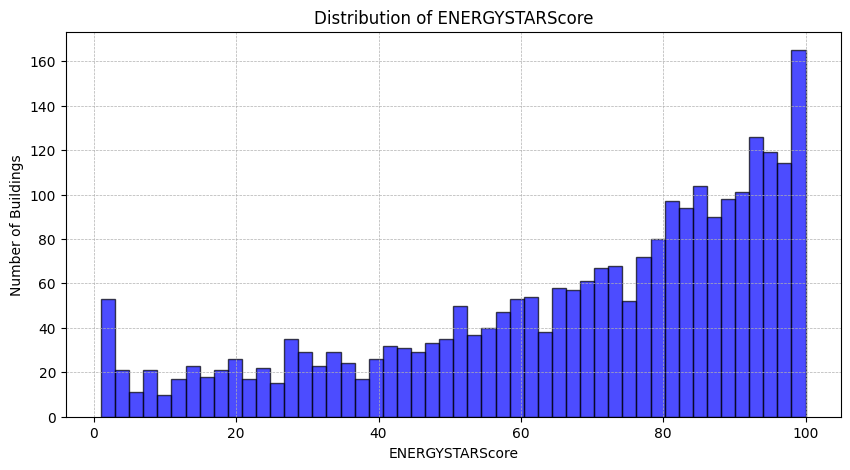

In [10]:
plt.figure(figsize=(10, 5))
plt.hist(df2015['ENERGYSTARScore'].dropna(), bins=50, edgecolor='black', color='blue', alpha=0.7)
plt.title('Distribution of ENERGYSTARScore')
plt.xlabel('ENERGYSTARScore')
plt.ylabel('Number of Buildings')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

This is beneficial as it can highlight the most common scores, showing us how energy-efficient the majority of the buildings are, and also point out if there are any extreme values or notable gaps in scores. This can guide further investigation or influence decisions related to energy efficiency measures.

Observation:
- There's a significant number of buildings with scores close to 100, suggesting that many buildings are highly energy efficient according to the ENERGYSTAR rating.
- On the other hand, there are relatively fewer buildings with scores below 20, signifying that a minimal number of buildings are rated poorly in terms of energy efficiency.
- There is a steady increase in the number of buildings as the score progresses from around 40 to 100, which denotes a positive trend in terms of building energy efficiency.

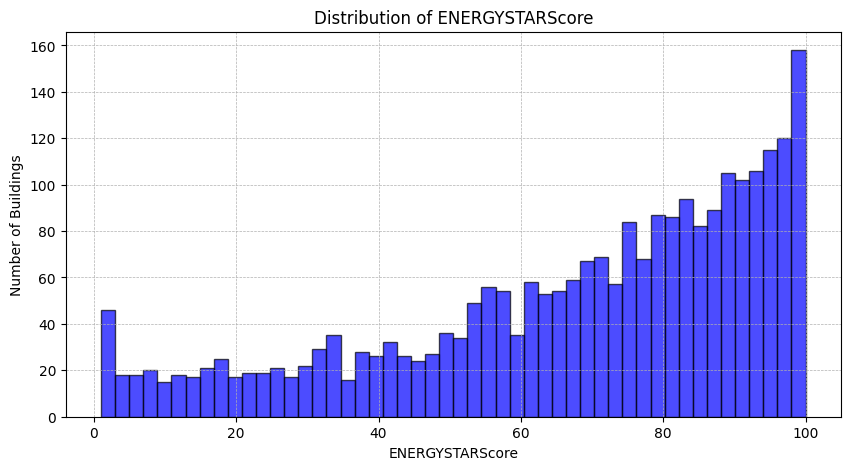

In [11]:
plt.figure(figsize=(10, 5))
plt.hist(df2016['ENERGYSTARScore'].dropna(), bins=50, edgecolor='black', color='blue', alpha=0.7)
plt.title('Distribution of ENERGYSTARScore')
plt.xlabel('ENERGYSTARScore')
plt.ylabel('Number of Buildings')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Observation:

Compared to the df2015 histogram:

- A pronounced peak near the 100 score suggests more buildings achieved top energy efficiency in 2016.
- The distribution from scores 20 onwards rises, indicating increased energy efficiency across buildings.
- Some buildings, with scores between 0-20, still lag in efficiency.
- When contrasted with 2015, there seems to be a shift towards higher scores in 2016, hinting at potential improvements in building energy standards over the year.

This cell is dedicated for understanding the distribution of GHG emissions across buildings.It is beneficial for our goal as it allows us to identify which buildings are the major contributors to emissions.

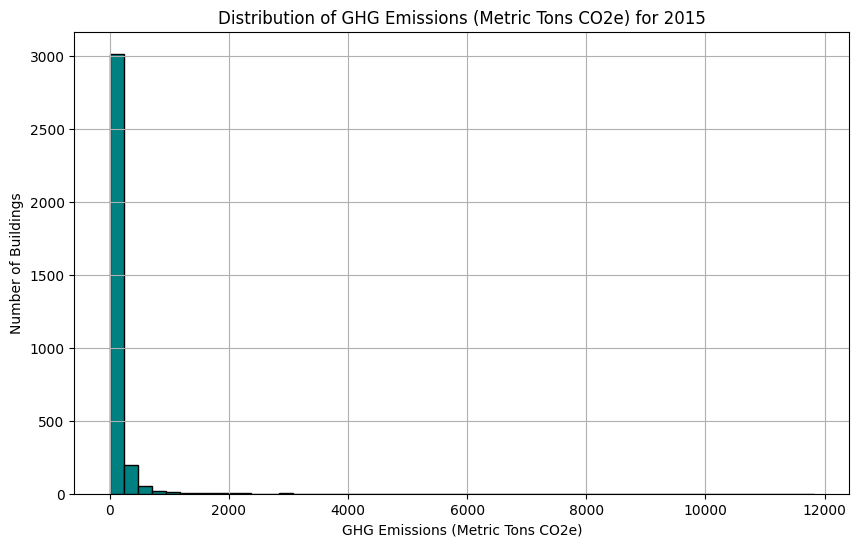

In [12]:
plt.figure(figsize=(10,6))
df2015['GHGEmissions(MetricTonsCO2e)'].hist(bins=50, color='teal', edgecolor='black')
plt.title('Distribution of GHG Emissions (Metric Tons CO2e) for 2015')
plt.xlabel('GHG Emissions (Metric Tons CO2e)')
plt.ylabel('Number of Buildings')
plt.show()

Observation:

- The majority of the buildings emit very low GHG emissions, with over 3000 buildings falling in the first bin (0-2000 Metric Tons CO2e).
- There is a sharp decline as the GHG Emissions value increases, indicating that there are very few buildings that are high emitters.
- Only a minuscule number of buildings emit more than 2000 Metric Tons CO2e, making them outliers or exceptional cases.

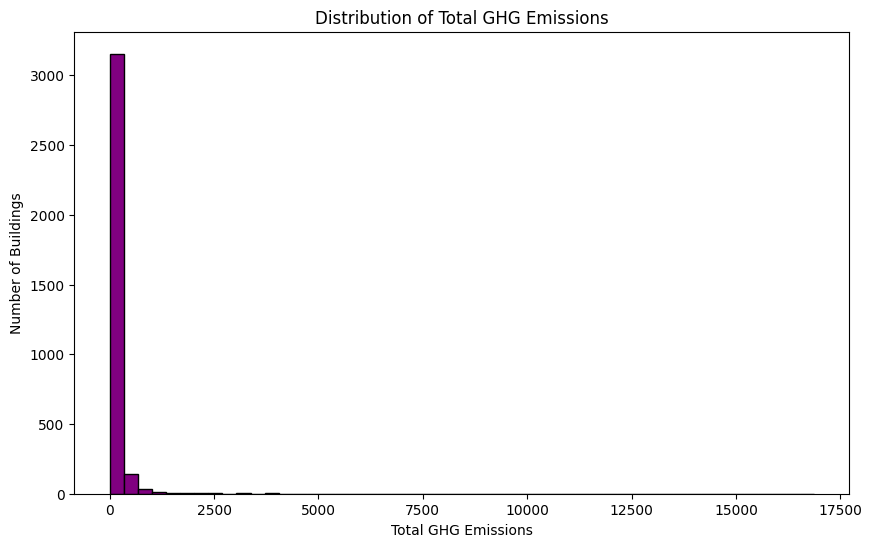

In [13]:
plt.figure(figsize=(10,6))
plt.hist(df2016['TotalGHGEmissions'], bins=50, color='purple', edgecolor='black')
plt.title('Distribution of Total GHG Emissions')
plt.xlabel('Total GHG Emissions')
plt.ylabel('Number of Buildings')
plt.show()

Observation:

- Similar to the 2015 data, most buildings have a low GHG emissions value, with the largest number of buildings falling in the first bin.
- The histogram drops sharply after the first bin, emphasizing that high emission buildings are rare.
- The data suggests a high concentration of buildings with minimal emissions, while very few buildings contribute significantly to the overall GHG emissions.

## 4.2 Missing Data Visualization
This section visualizes the missing data in the datasets, providing a heatmap representation which can give a clear idea about the columns that might need data imputation or other preprocessing steps.

### 4.2.1 Visualization of Missing Data in 'df2015'
Visualize missing data in the 'df2015' DataFrame to identify columns with missing values.

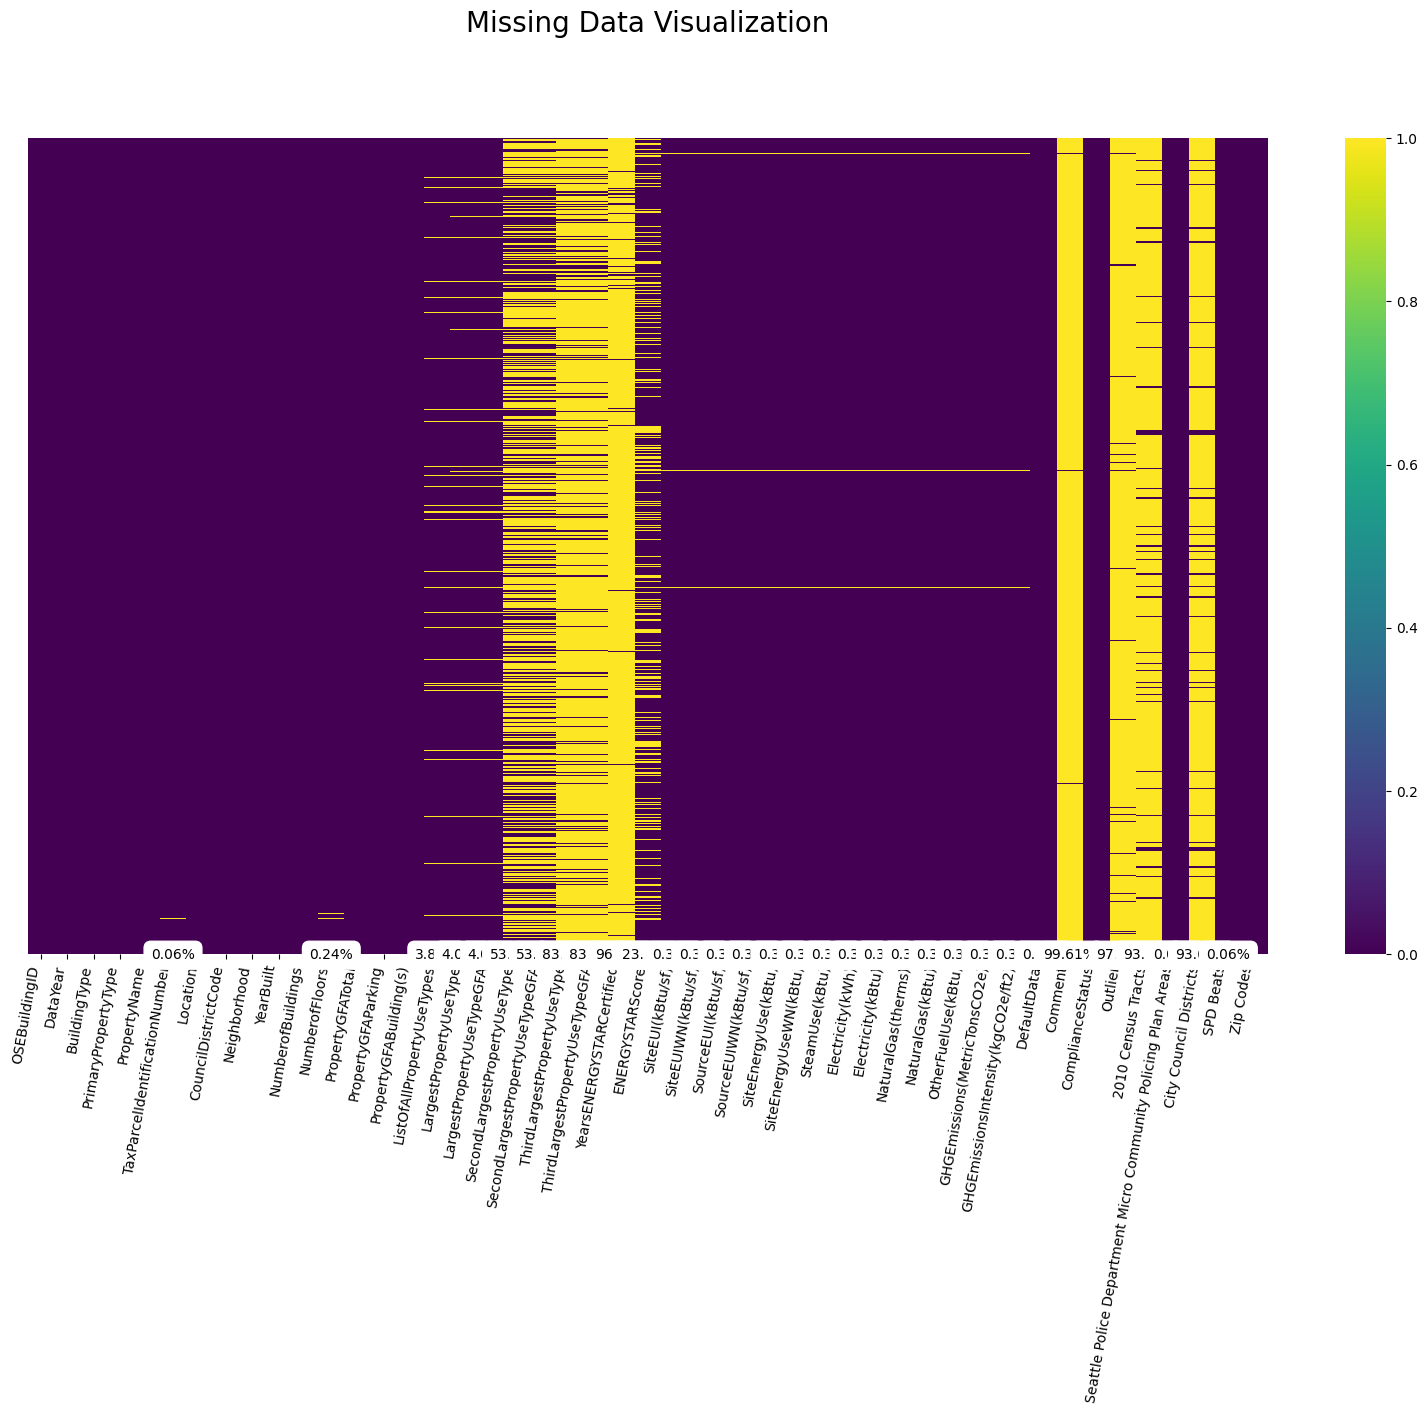

In [14]:
plt.figure(figsize=(20, 12))

sns.heatmap(df2015.isnull(), cmap='viridis', cbar=True, yticklabels=False)

plt.title('Missing Data Visualization', fontsize=20, y=1.12)

plt.xticks(np.arange(0.5, len(df2015.columns), 1), df2015.columns, rotation=80, ha='right', fontsize=10)

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray')

for i, column in enumerate(df2015.columns):
    missing_percentage = df2015[column].isnull().mean()
    if missing_percentage > 0:
        plt.text(i + 0.5, df2015.shape[0] + 4, f"{missing_percentage:.2%}",
                 ha='center', va='center', fontsize=10, color='black',
                 bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

plt.subplots_adjust(bottom=0.2)

plt.show()

### Filtered Visualization for Columns with Missing Data in 'df2015'

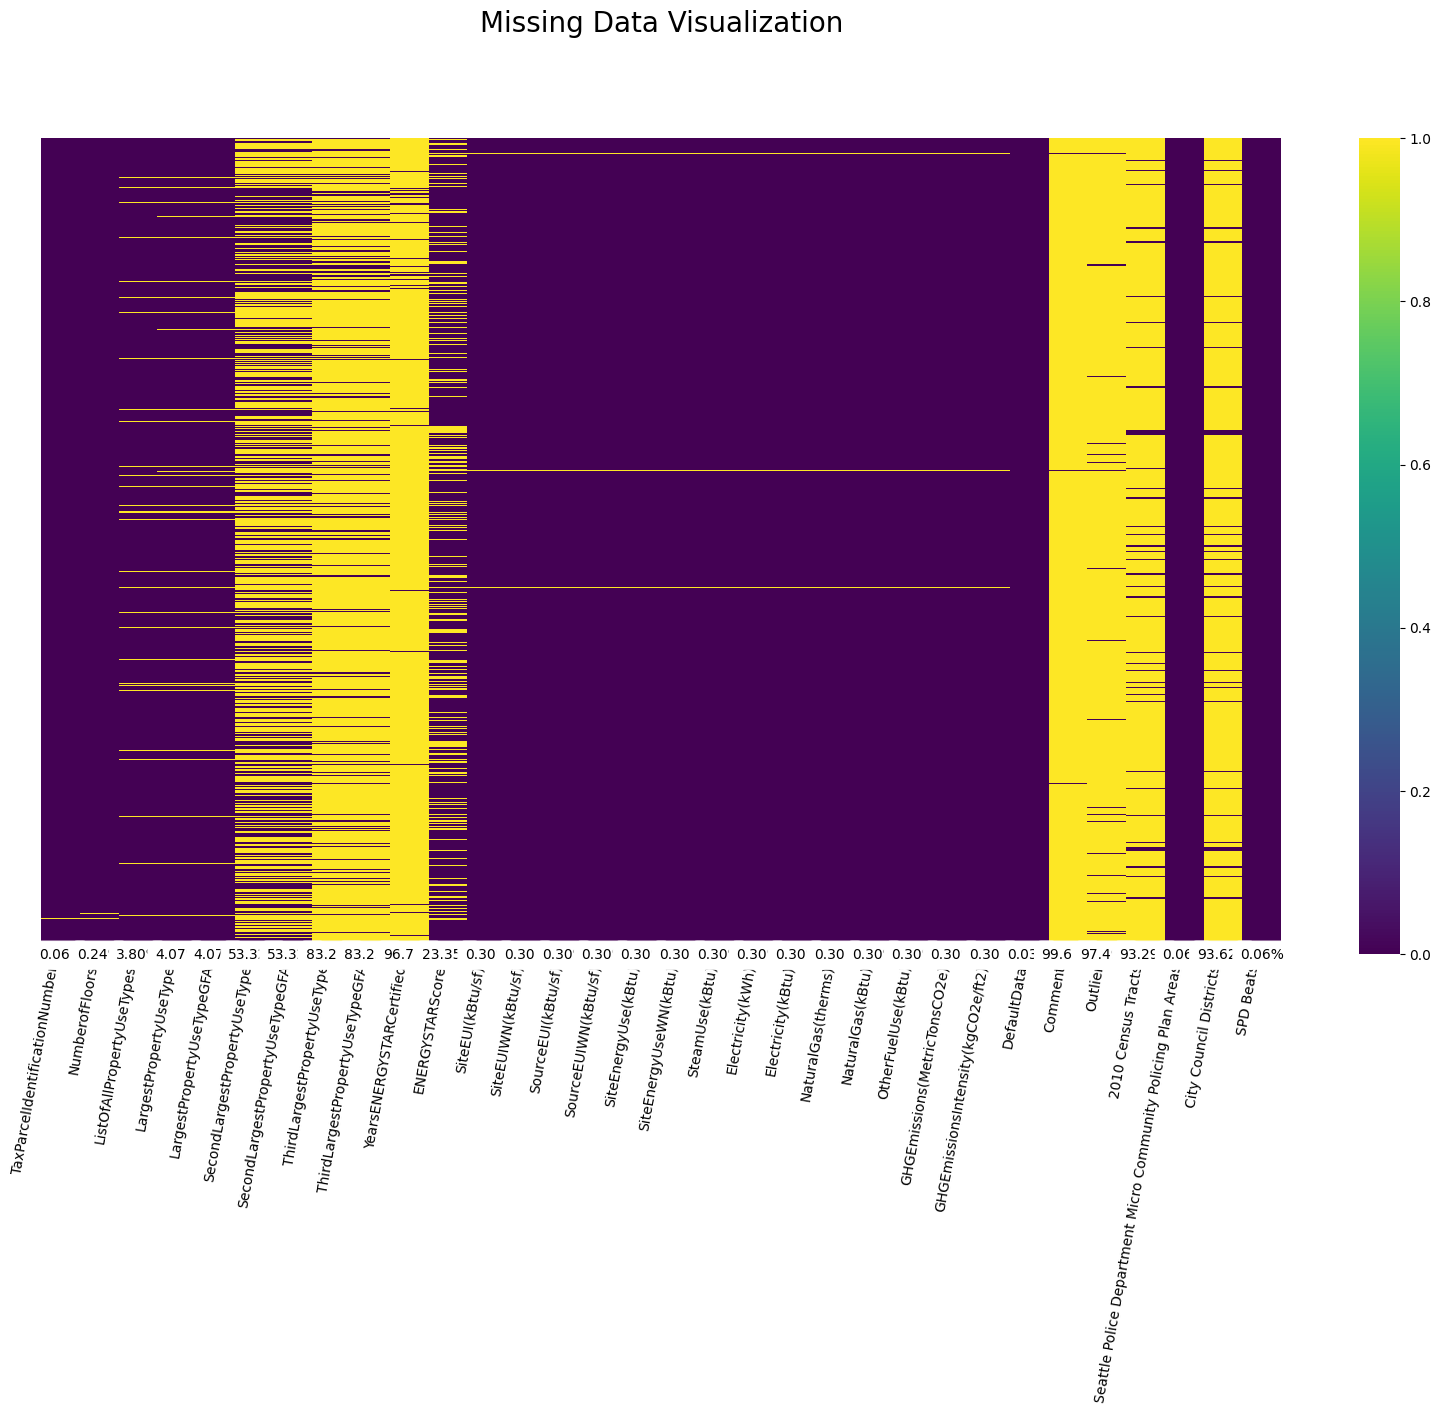

In [15]:
missing_data_cols = df2015.columns[df2015.isnull().any()].tolist()

filtered_df = df2015[missing_data_cols]

plt.figure(figsize=(20, 12))

sns.heatmap(filtered_df.isnull(), cmap='viridis', cbar=True, yticklabels=False)

plt.title('Missing Data Visualization', fontsize=20, y=1.12)

plt.xticks(np.arange(0.5, len(filtered_df.columns), 1), filtered_df.columns, rotation=80, ha='right', fontsize=10)

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray')

for i, column in enumerate(filtered_df.columns):
    missing_percentage = filtered_df[column].isnull().mean()
    plt.text(i + 0.5, filtered_df.shape[0] + 4, f"{missing_percentage:.2%}",
             ha='center', va='center', fontsize=10, color='black',
             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

plt.subplots_adjust(bottom=0.2)

plt.show()

The heatmap for df2015 shows mostly purple, meaning most data is there. Some columns have yellow lines, meaning they're missing some information. One column in the middle has a lot of yellow, which means it's missing a lot of data. The names at the bottom are the columns' names, and some have percentages showing how much data they're missing. We observed in df2015 that the columns with the most missing values are :

- Comments, Outlier, YearENERGYSTARCertified, ThirdLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, SecondLargestPropertyUseType and ENERGYSTARScore.

### Visualization of Missing Data in 'df2016'

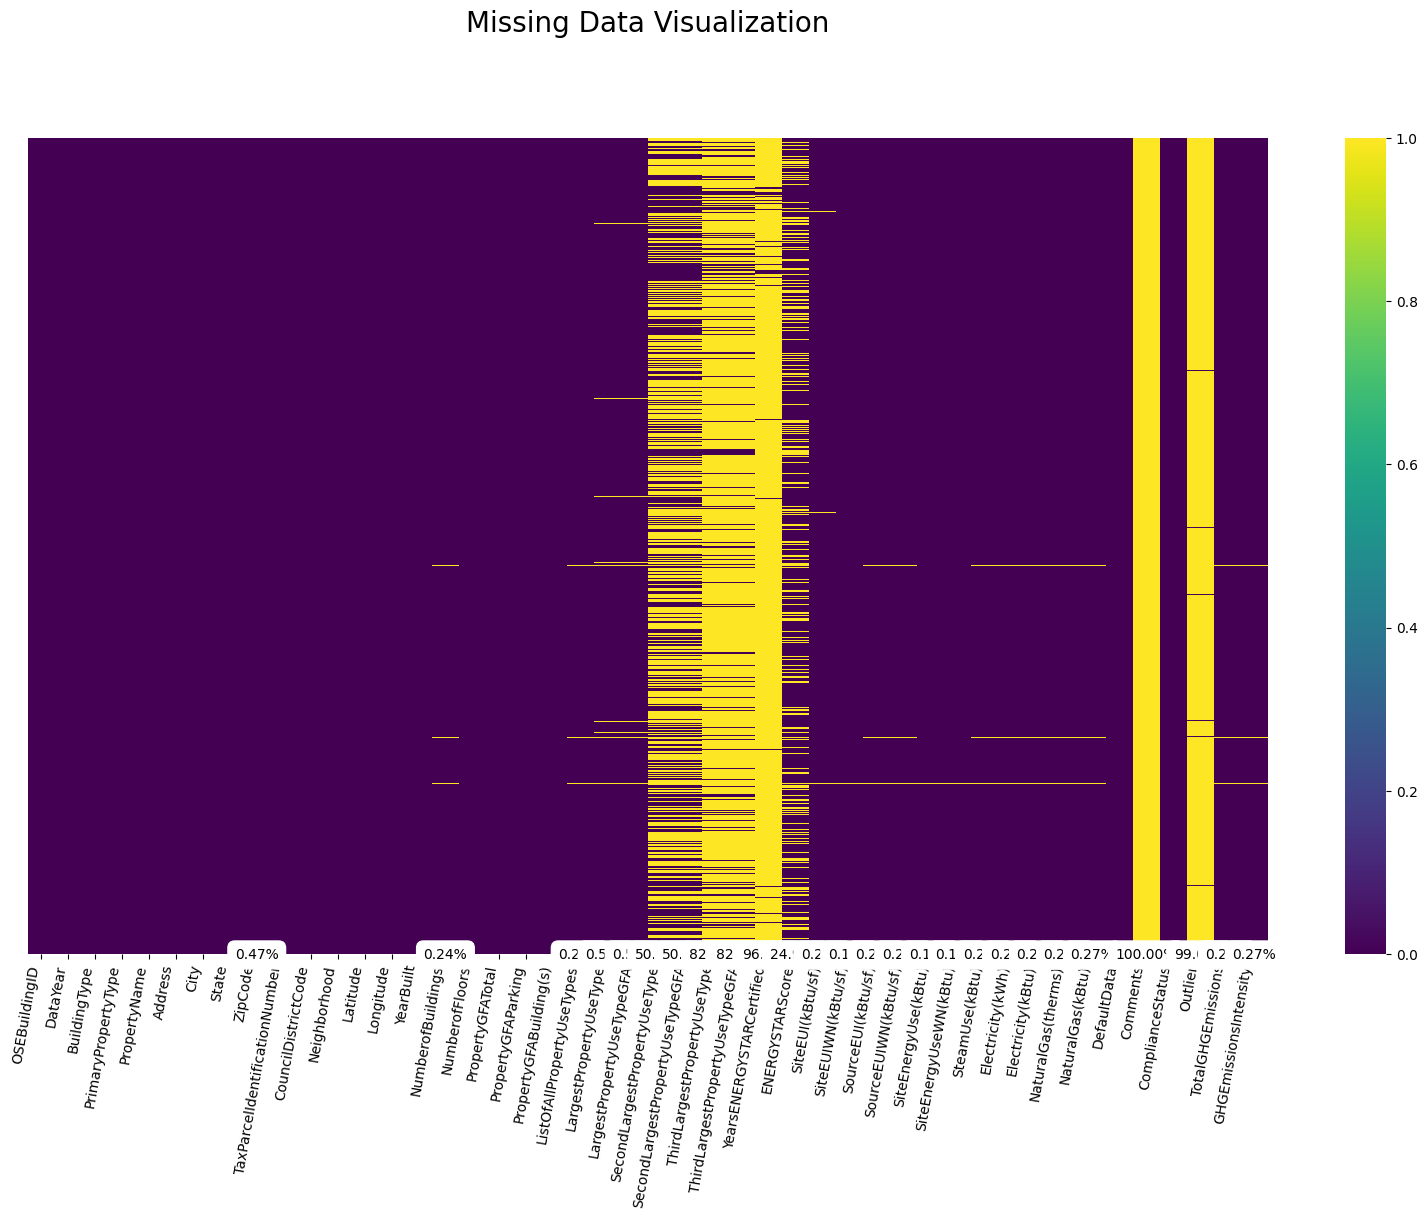

In [16]:
plt.figure(figsize=(20, 12))

sns.heatmap(df2016.isnull(), cmap='viridis', cbar=True, yticklabels=False)

plt.title('Missing Data Visualization', fontsize=20, y=1.12)

plt.xticks(np.arange(0.5, len(df2016.columns), 1), df2016.columns, rotation=80, ha='right', fontsize=10)

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray')

for i, column in enumerate(df2016.columns):
    missing_percentage = df2016[column].isnull().mean()
    if missing_percentage > 0:
        plt.text(i + 0.5, df2016.shape[0] + 4, f"{missing_percentage:.2%}",
                 ha='center', va='center', fontsize=10, color='black',
                 bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

plt.subplots_adjust(bottom=0.2)

plt.show()

### Filtered Visualization for Columns with Missing Data in 'df2016'

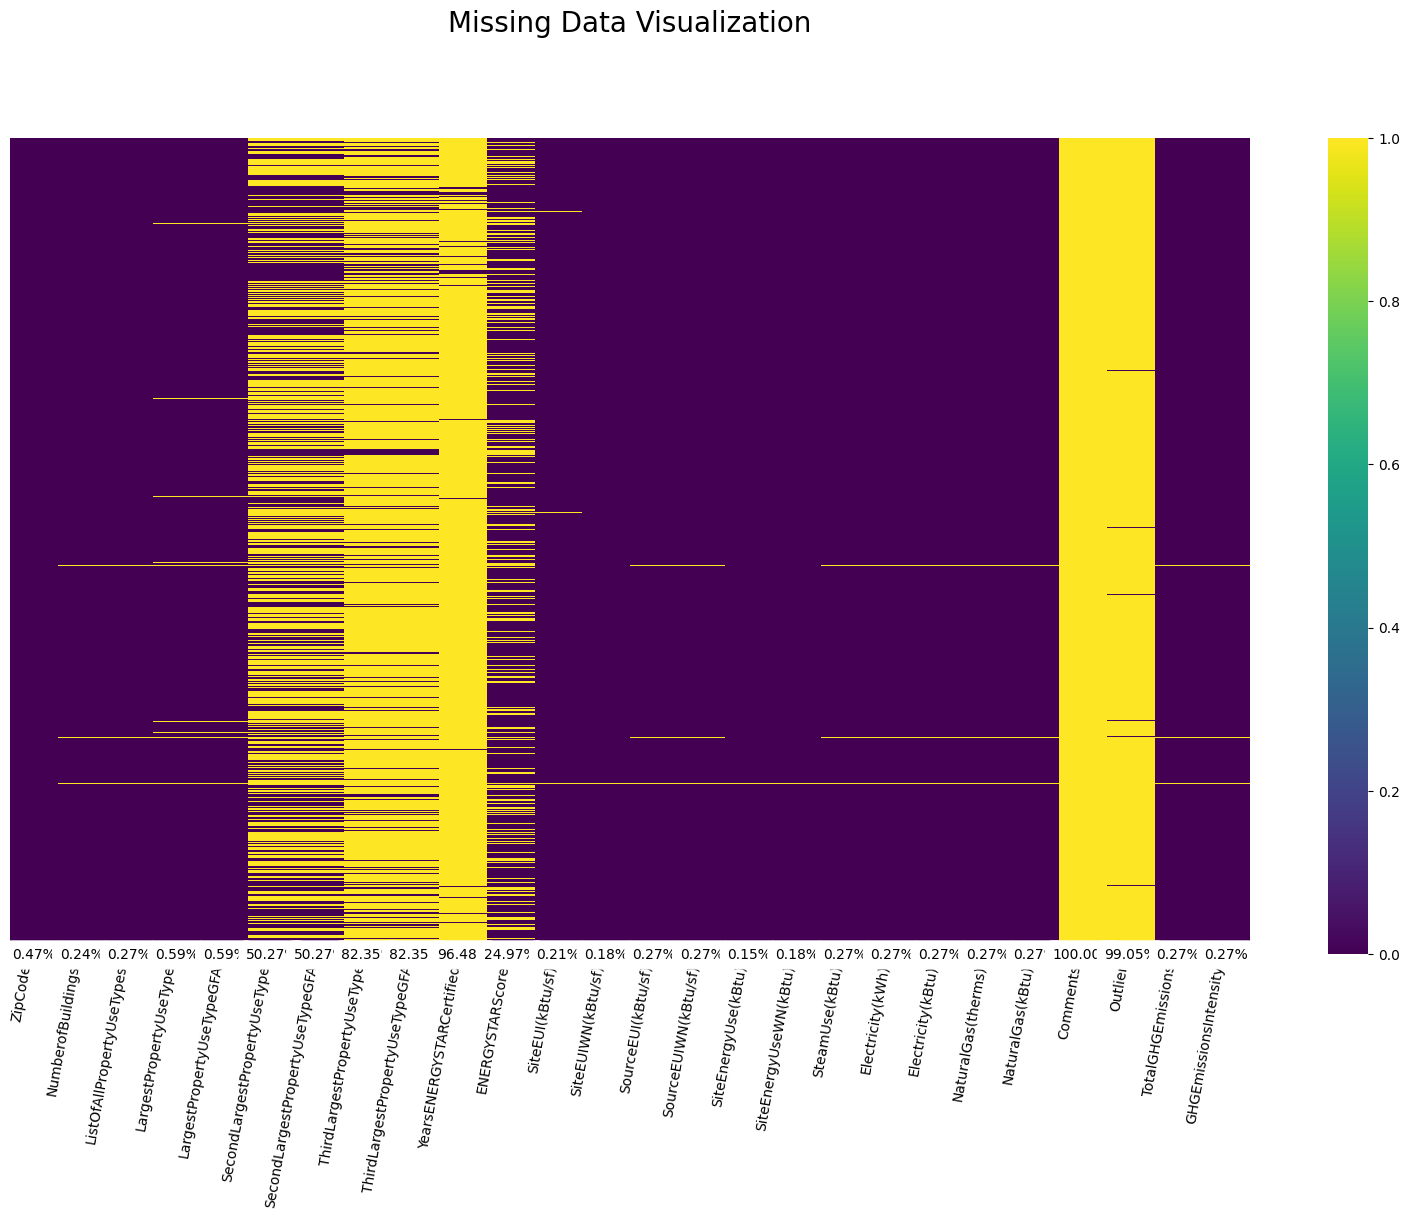

In [17]:
missing_data_cols = df2016.columns[df2016.isnull().any()].tolist()

filtered_df = df2016[missing_data_cols]

plt.figure(figsize=(20, 12))

sns.heatmap(filtered_df.isnull(), cmap='viridis', cbar=True, yticklabels=False)

plt.title('Missing Data Visualization', fontsize=20, y=1.12)

plt.xticks(np.arange(0.5, len(filtered_df.columns), 1), filtered_df.columns, rotation=80, ha='right', fontsize=10)

plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray')

for i, column in enumerate(filtered_df.columns):
    missing_percentage = filtered_df[column].isnull().mean()
    plt.text(i + 0.5, filtered_df.shape[0] + 4, f"{missing_percentage:.2%}",
             ha='center', va='center', fontsize=10, color='black',
             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))

plt.subplots_adjust(bottom=0.2)

plt.show()


The heatmap for df2016 predominantly displays a purple hue, signifying a comprehensive data presence across most columns. However, certain columns stand out with pronounced yellow streaks, highlighting areas with missing data. One column towards the center is particularly distinct, revealing a substantial portion of missing data compared to others.
We observed in df2016 that the columns with the most missing values are :

- Comments, Outlier, YearENERGYSTARCertified, ThirdLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, SecondLargestPropertyUseType and ENERGYSTARScore

# 5. Data Summarization
This section is dedicated to summarizing the datasets to provide key statistics, especially focusing on numerical columns, and also showcasing the top unique values for categorical columns.
## 5.1 'df2015' Data Summarization

In [18]:
numerical_summary = df2015.describe()

numerical_summary

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,...,NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
count,3340.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,...,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,224.000000,3338.000000,213.000000,3338.000000,3340.000000
mean,20522.168263,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,...,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,123.062500,32.380168,1.347418,24.825644,18786.680240
std,11511.515874,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,...,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,5.812128,19.907567,0.477272,15.006287,588.604192
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,116.000000,1.000000,1.000000,1.000000,17916.000000
25%,19921.750000,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,117.000000,14.000000,1.000000,10.000000,18379.000000
50%,22977.000000,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,...,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,123.000000,33.000000,1.000000,26.000000,18390.000000
75%,25748.000000,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,...,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000,125.500000,50.000000,2.000000,38.000000,19576.000000
max,50059.000000,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,...,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000,135.000000,61.000000,2.000000,51.000000,19584.000000


The following cell lists and analyzes categorical columns from the df2015 dataset. For each categorical column, it displays the number of unique values, and the top occurrences with their counts.

In [19]:
categorical_cols = df2015.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Number of unique values: {df2015[col].nunique()}")
    print(f"Most common values:\n{df2015[col].value_counts().head()}\n")

Column: BuildingType
Number of unique values: 7
Most common values:
NonResidential          1461
Multifamily LR (1-4)    1029
Multifamily MR (5-9)     554
Multifamily HR (10+)     107
SPS-District K-12         99
Name: BuildingType, dtype: int64

Column: PrimaryPropertyType
Number of unique values: 27
Most common values:
Low-Rise Multifamily           998
Mid-Rise Multifamily           539
Small- and Mid-Sized Office    297
Other                          258
Non-Refrigerated Warehouse     187
Name: PrimaryPropertyType, dtype: int64

Column: PropertyName
Number of unique values: 3287
Most common values:
WAREHOUSE                   9
OFFICE BUILDING             8
CLOVERDALE BUSINESS PARK    5
APARTMENTS                  4
CANAL PL OFFICE PARK        3
Name: PropertyName, dtype: int64

Column: TaxParcelIdentificationNumber
Number of unique values: 3245
Most common values:
925049346     5
3224049012    5
2400002       5
8632880000    4
3624039009    4
Name: TaxParcelIdentificationNumber, d

## 5.2 'df2016' Data Summarization

In [20]:
numerical_summary = df2016.describe()

numerical_summary

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,...,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,...,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,...,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,...,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,...,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,...,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,...,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


The following cell lists and analyzes categorical columns from the df2016 dataset. For each categorical column, it displays the number of unique values, and the top occurrences with their counts.

In [21]:
categorical_cols = df2016.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Number of unique values: {df2016[col].nunique()}")
    print(f"Most common values:\n{df2016[col].value_counts().head()}\n")

Column: BuildingType
Number of unique values: 8
Most common values:
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Name: BuildingType, dtype: int64

Column: PrimaryPropertyType
Number of unique values: 24
Most common values:
Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Name: PrimaryPropertyType, dtype: int64

Column: PropertyName
Number of unique values: 3362
Most common values:
Northgate Plaza               3
Canal Building                2
Jefferson Court Apartments    2
Bayview Building              2
Crestview Apartments          2
Name: PropertyName, dtype: int64

Column: Address
Number of unique values: 3354
Most common values:
2600 SW Barton St              4
2203 Airport Way S             4
309 South Cloverdale Street    4
516 1st Ave W                  

Observations:
- Data Coverage: Most columns have 3,340 entries; some like 2010 Census Tracts show missing data.
- Property Size: Average parking is 11,054 sq. ft.; building area is 79,718 sq. ft.
- Emissions: Average GHG emissions are 110 metric tons CO2e, with some outliers at 11,824.89.
- YearBuilt: Buildings range from 1900-2015, with an average year of 1967.
- Building Details: Average of 1 building and 4.68 floors per entry, with extremes at 39 buildings and 99 floors.
- Gas Consumption: While many don't use natural gas (25th percentile is 0), some have high consumption.

# 6. Dataset Comparison

This section of the code is dedicated to comparing the structures of the df2015 and df2016 datasets by examining their columns. This comparison provides insights into the similarities and differences in the datasets' structures. By closely examining these elements, we can more effectively handle inconsistencies.

### Display Common Columns
Find columns that are common in both DataFrames. It checks column names within those columns.

In [22]:
def display_common_columns(df, common_columns):
    columns_df = set(df.columns)
    common_columns = columns_df.intersection(common_columns)

    print("Common Columns:")
    print("----------------")
    if common_columns:
        print('\n'.join(common_columns))
    else:
        print("No common columns")
common_columns = set(df2015.columns).intersection(set(df2016.columns))
display_common_columns(df2015, common_columns)

Common Columns:
----------------
PropertyName
SourceEUIWN(kBtu/sf)
NaturalGas(kBtu)
TaxParcelIdentificationNumber
SiteEnergyUseWN(kBtu)
NumberofFloors
ThirdLargestPropertyUseTypeGFA
YearsENERGYSTARCertified
ENERGYSTARScore
PrimaryPropertyType
YearBuilt
PropertyGFABuilding(s)
SecondLargestPropertyUseTypeGFA
Electricity(kBtu)
Neighborhood
DefaultData
NaturalGas(therms)
SourceEUI(kBtu/sf)
NumberofBuildings
ListOfAllPropertyUseTypes
SteamUse(kBtu)
SiteEnergyUse(kBtu)
DataYear
OSEBuildingID
BuildingType
ThirdLargestPropertyUseType
SecondLargestPropertyUseType
CouncilDistrictCode
ComplianceStatus
Outlier
SiteEUIWN(kBtu/sf)
LargestPropertyUseType
SiteEUI(kBtu/sf)
Electricity(kWh)
PropertyGFATotal
LargestPropertyUseTypeGFA
PropertyGFAParking


### Display Columns present in df2015 but not in df2016

In [23]:
# Function to display columns unique to a dataframe
def display_columns_unique_to_df(df, df_name, common_columns):
    columns_df = set(df.columns)
    unique_columns = columns_df.difference(common_columns)

    print(f"Unique columns in {df_name}:")
    print("------------------------------------")
    if unique_columns:
        print('\n'.join(unique_columns))
    else:
        print(f"No unique columns in {df_name}")

display_columns_unique_to_df(df2015, "df2015", common_columns)

Unique columns in df2015:
------------------------------------
Location
GHGEmissionsIntensity(kgCO2e/ft2)
City Council Districts
OtherFuelUse(kBtu)
2010 Census Tracts
SPD Beats
GHGEmissions(MetricTonsCO2e)
Comment
Zip Codes
Seattle Police Department Micro Community Policing Plan Areas


###  Display Columns present in df2016 but not in df2015

In [24]:
display_columns_unique_to_df(df2016, "df2016", common_columns)

Unique columns in df2016:
------------------------------------
Longitude
TotalGHGEmissions
Address
Comments
Latitude
ZipCode
GHGEmissionsIntensity
State
City


### Display Identical Columns
identical_columns function compares two DataFrames and returns a list of columns that are identical in both.
It checks both column names and values within those columns.

In [25]:
def display_identical_columns(df1, df2, df1_name, df2_name):
    identical_cols = []

    for col in common_columns:
        if df1[col].equals(df2[col]):
            identical_cols.append(col)

    print(f"Identical Columns between {df1_name} and {df2_name}:")
    print("------------------")
    if identical_cols:
        print('\n'.join(identical_cols))
    else:
        print(f"No identical columns found between {df1_name} and {df2_name}")

display_identical_columns(df2015, df2016, 'df2015', 'df2016')

Identical Columns between df2015 and df2016:
------------------
No identical columns found between df2015 and df2016


### Duplicate Rows Check

In [26]:
def display_duplicate_rows(df, df_name):
    duplicate_rows = df[df.duplicated()]

    print(f"Number of duplicate rows in {df_name}: {len(duplicate_rows)}")

    if len(duplicate_rows) > 0:
        print(f"Displaying duplicate rows in {df_name}:")
        print(duplicate_rows)

display_duplicate_rows(df2015, 'df2015')
display_duplicate_rows(df2016, 'df2016')

Number of duplicate rows in df2015: 0
Number of duplicate rows in df2016: 0


In the Dataset Comparison section, we analyzed 'df2015' and 'df2016'. Key findings include:

- Common Columns: Both datasets share several columns, crucial for analysis.
- Unique Columns: 'df2015' has exclusive columns like 'OtherFuelUse(kBtu)' and 'Location', while 'df2016' has 'City', 'State', and 'ZipCode'.
- Identical Columns: No columns had matching values across both datasets.
- Duplicate Rows: Neither dataset had duplicate rows.

# 7. Data Cleaning

### 7.2 Expanding Nested Columns in 'df2015' Dataset
In this section, we will expand the Location column in the df2015 DataFrame. This column contains serialized strings representing dictionary-like structures that hold multiple attributes such as latitude, longitude, address, city ,and state.
Expanding this column will transform each attribute within the serialized string into individual columns in our DataFrame, enhancing the readability and usability of the dataset.

In [27]:
df2015_expanded = pd.concat([
    df2015.drop(['Location'], axis=1),
    df2015['Location'].map(ast.literal_eval).apply(pd.Series)
], axis=1)

df2015 = pd.concat([
    df2015_expanded.drop(['human_address'], axis=1),
    df2015_expanded['human_address'].map(ast.literal_eval).apply(pd.Series)
], axis=1)

df2015.rename(columns={
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'address': 'Address',
    'city': 'City',
    'state': 'State',
}, inplace=True)

df2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,...,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,Latitude,Longitude,Address,City,State,zip
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1,...,14.0,NaN,31.0,18081,47.61219025,-122.33799744,405 OLIVE WAY,SEATTLE,WA,98101
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1,...,14.0,NaN,31.0,18081,47.61310583,-122.33335756,724 PINE ST,SEATTLE,WA,98101
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1,...,56.0,NaN,31.0,18081,47.61334897,-122.33769944,1900 5TH AVE,SEATTLE,WA,98101
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1,...,56.0,NaN,31.0,18081,47.61421585,-122.33660889,620 STEWART ST,SEATTLE,WA,98101
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1,...,56.0,NaN,31.0,19576,47.6137544,-122.3409238,401 LENORA ST,SEATTLE,WA,98121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,6599950000,2,DOWNTOWN,2000,1,...,26.0,NaN,16.0,18379,47.59950256,-122.32034302,321 10TH AVE S,SEATTLE,WA,98104
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,1142001670,4,NORTHEAST,2014,1,...,60.0,NaN,38.0,18383,47.65752471,-122.3160159,4123 12TH AVE NE,SEATTLE,WA,98105
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,660000575,7,DOWNTOWN,2015,1,...,56.0,NaN,7.0,19576,47.61649845,-122.33770787,2030 8TH AVE,SEATTLE,WA,98121
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,6392001040,4,NORTHEAST,1981,1,...,55.0,NaN,48.0,18792,47.68396954,-122.2874088,3801 NE 77TH ST,SEATTLE,WA,98115


### 7.3 Removal of Irrelevant Columns

- TaxParcelIdentificationNumber: This is likely a unique identifier for tax purposes and does not hold analytical value for our study on emissions and energy usage.
- YearsENERGYSTARCertified: The years in which the building was ENERGY STAR certified may not contribute to our current analysis objectives.
- DefaultData: this column consists mostly of missing data, it would not provide valuable insights.
- Outlier: Columns labeling outliers are generally for information purposes and are not be essential for primary analysis objectives.
- City and State: Since the datasets likely pertain to buildings within a specific city and state, these columns might not offer variability or contribute to the analysis.
- OtherFuelUse(kBtu) column : Majority of values are zero
- 2010 Census Tracts , SPD Beats and Seattle Police Department Micro Community Policing Plan Areas columns : Not relevant to our analysis
- City Council Districts column: Most values are missing
- Comments column: Contains annotations that are not pertinent to predicting emissions or consumption
- ComplianceStatus: it is not relevant to predicting GHG emissions. It represents whether the property is compliant with certain regulations, which may not directly influence or correlate with GHG emissions.

#### 7.3.1 Dropping Irrelevant Columns from 2015 Dataset
In this step, we are focusing on refining the 2015 dataset by removing columns that are not present in the 2016 dataset and are not relevant or essential.

In [28]:
columns_to_drop = [
    'TaxParcelIdentificationNumber',
    'YearsENERGYSTARCertified',
    'DefaultData',
    'Outlier',
    'City',
    'ComplianceStatus',
    'State',
    'OtherFuelUse(kBtu)',
    '2010 Census Tracts',
    'Seattle Police Department Micro Community Policing Plan Areas',
    'City Council Districts',
    'SPD Beats',
    'Comment',
    'Zip Codes',
    'zip'
]

df2015.drop(columns=columns_to_drop, inplace=True)

df2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Latitude,Longitude,Address
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,7,DOWNTOWN,1927,1,12.0,...,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,47.61219025,-122.33799744,405 OLIVE WAY
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,7,DOWNTOWN,1996,1,11.0,...,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,47.61310583,-122.33335756,724 PINE ST
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,7,DOWNTOWN,1969,1,41.0,...,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,47.61334897,-122.33769944,1900 5TH AVE
3,5,2015,NonResidential,Hotel,HOTEL MAX,7,DOWNTOWN,1926,1,10.0,...,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,47.61421585,-122.33660889,620 STEWART ST
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,7,DOWNTOWN,1980,1,18.0,...,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,47.6137544,-122.3409238,401 LENORA ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,2,DOWNTOWN,2000,1,4.0,...,0.0,334979.0,1142996.0,0.0,0.0,7.97,0.07,47.59950256,-122.32034302,321 10TH AVE S
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,4,NORTHEAST,2014,1,7.0,...,0.0,325705.0,1111352.0,4320.0,431976.0,30.69,0.61,47.65752471,-122.3160159,4123 12TH AVE NE
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,7,DOWNTOWN,2015,1,40.0,...,0.0,1690364.0,5767761.0,110669.0,11066893.0,627.97,1.89,47.61649845,-122.33770787,2030 8TH AVE
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,4,NORTHEAST,1981,1,3.0,...,0.0,227744.0,777096.0,0.0,0.0,5.42,0.04,47.68396954,-122.2874088,3801 NE 77TH ST


#### 7.3.2  Dropping Irrelevant Columns from 2016 Dataset
In this step, we will remove several columns deemed not relevant from df2016 datasets.


In [29]:
non_pertinent_columns = [
    'TaxParcelIdentificationNumber',
    'YearsENERGYSTARCertified',
    'DefaultData',
    'Outlier',
    'ComplianceStatus',
    'City',
    'State',
    'Comments',
    'ZipCode'
]

df2016.drop(columns=non_pertinent_columns, inplace=True)

print("Modified df2016:")
df2016

Modified df2016:


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,7,DOWNTOWN,47.61220,-122.33799,...,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,7,DOWNTOWN,47.61317,-122.33393,...,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,7,DOWNTOWN,47.61393,-122.33810,...,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,7,DOWNTOWN,47.61412,-122.33664,...,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,7,DOWNTOWN,47.61375,-122.34047,...,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,2,GREATER DUWAMISH,47.56722,-122.31154,...,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,2,DOWNTOWN,47.59625,-122.32283,...,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,...,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,1,GREATER DUWAMISH,47.52832,-122.32431,...,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57


### 7.3 Rename Columns
Renaming the columns in df2015 DataFrame to make them consistent with df2016.

In [30]:
rename_dict = {
    'Comment': 'Comments',
    'zip':'ZipCode',
}

df2015.rename(columns=rename_dict, inplace=True)

print(df2015.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
       'GHGEmissionsIntensity(kgCO2e/ft2)', 'Latitude', 'Longitude',
       'Address'],
      dtype='object')


### 7.3.1 Column Name Standardization
We observed that there are columns in the df2015 dataset that represent the same information as columns in df2016 but are named differently. Specifically, the columns GHGEmissions(MetricTonsCO2e) and GHGEmissionsIntensity(kgCO2e/ft2) in df2015 correspond to TotalGHGEmissions and GHGEmissionsIntensity in df2016, respectively.

To ensure uniformity and avoid confusion in later stages of data processing and analysis, we will standardize these column names in the df2015 dataset.

In [31]:
check_to_combine_df2015 = df2015[['GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)']]
print("Statistics for df2015 before renaming:")
print(check_to_combine_df2015.describe())

df2015.rename(columns={
    'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions',
    'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity'
}, inplace=True)

print("Statistics for df2015 after renaming:")
print(df2015[['TotalGHGEmissions', 'GHGEmissionsIntensity']].describe())

Statistics for df2015 before renaming:
       GHGEmissions(MetricTonsCO2e)  GHGEmissionsIntensity(kgCO2e/ft2)
count                   3330.000000                        3330.000000
mean                     110.094102                           0.985339
std                      409.450179                           1.637172
min                        0.000000                           0.000000
25%                        9.265000                           0.080000
50%                       32.740000                           0.460000
75%                       88.642500                           1.180000
max                    11824.890000                          31.380000
Statistics for df2015 after renaming:
       TotalGHGEmissions  GHGEmissionsIntensity
count        3330.000000            3330.000000
mean          110.094102               0.985339
std           409.450179               1.637172
min             0.000000               0.000000
25%             9.265000               0.080

### 7.4 Exclusion of Residential Buildings
This section aims to filter out the residential buildings from our dataset, as our focus is primarily on the emissions from non-residential buildings. By doing this, we can obtain a more tailored dataset, providing clearer insights into the emissions from buildings not intended for habitation.

#### For 2015 Dataset

In [32]:
building_type_2015 = df2015['BuildingType'].value_counts().to_frame()
print("Building Types and their counts:")
print(building_type_2015)

exclude_residential = ~(df2015['BuildingType'].str.contains('multifamily', case=False))

print(f'Number of rows to be removed (residential buildings): {df2015[~exclude_residential].shape[0]}')

df2015_non_residential = df2015[exclude_residential]

print(f'Number of rows after removing residential buildings: {df2015_non_residential.shape[0]}')

Building Types and their counts:
                      BuildingType
NonResidential                1461
Multifamily LR (1-4)          1029
Multifamily MR (5-9)           554
Multifamily HR (10+)           107
SPS-District K-12               99
Nonresidential COS              68
Campus                          22
Number of rows to be removed (residential buildings): 1690
Number of rows after removing residential buildings: 1650


#### For 2016 Dataset

In [33]:
building_type_2016 = df2016['BuildingType'].value_counts().to_frame()
print("Building Types and their counts:")
print(building_type_2016)

exclude_residential = ~(df2016['BuildingType'].str.contains('multifamily', case=False))

print(f'Number of rows to be removed (residential buildings): {df2016[~exclude_residential].shape[0]}')

df2016_non_residential = df2016[exclude_residential]

print(f'Number of rows after removing residential buildings: {df2016_non_residential.shape[0]}')

Building Types and their counts:
                      BuildingType
NonResidential                1460
Multifamily LR (1-4)          1018
Multifamily MR (5-9)           580
Multifamily HR (10+)           110
SPS-District K-12               98
Nonresidential COS              85
Campus                          24
Nonresidential WA                1
Number of rows to be removed (residential buildings): 1708
Number of rows after removing residential buildings: 1668


### 7.5 Treatment of columns not filled out

#### Replacement of some missing values

The columns 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', and 'ThirdLargestPropertyUseTypeGFA' contain a lot of missing values. We assume that buildings with missing values for these variables do not have a second or third use, so we add a category to the types of use and replace the area values with 0.

#### For dataset 'df2015' :

In [34]:
columns = [
    'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseTypeGFA',
]

for column in columns:
    df2015[column].fillna(0, inplace=True)

In [35]:
df2015['NumberofFloors'].fillna(1, inplace=True)

This line is imputing the missing values in the 'NumberofFloors' column of the df2015 DataFrame with the value 1. The fillna function is used to fill in NaN (Not a Number) entries with a specified value, in this case, 1, which could represent a default or minimum number of floors for buildings where this information is missing.

In [36]:
for col in df2015.select_dtypes(include=np.number).columns:
    df2015[col].fillna(df2015[col].median(), inplace=True)

for col in df2015.select_dtypes(include='object').columns:
    df2015[col].fillna(df2015[col].mode()[0], inplace=True)

The first loop goes through all columns in df2015 that contain numerical data. For each numerical column, it fills in missing values (NaNs) with the median of that column.

The second loop processes all columns with datatype 'object', which typically include categorical variables. It fills in missing values with the mode of the respective column. The mode is the most frequently occurring value in a given set of data.

#### For dataset 'df2016' :

In [37]:
columns = [
    'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseTypeGFA',
]

for column in columns:
    df2016[column].fillna(0, inplace=True)

In [38]:
df2016['NumberofFloors'].fillna(1, inplace=True)

In [39]:
for col in df2016.select_dtypes(include=np.number).columns:
    df2016[col].fillna(df2015[col].median(), inplace=True)

for col in df2016.select_dtypes(include='object').columns:
    df2016[col].fillna(df2015[col].mode()[0], inplace=True)

#### Elimination of unspecified variables:
Columns with missing data exceeding 25% are removed.


#### For dataset 'df2015' :

In [40]:
null = df2015.isnull().sum(axis=0).sort_values()/len(df2015)*100
cond = null < 25
cond = cond[cond == True]
data = df2015.loc[:, cond.index]

#### For dataset 'df2016' :

In [41]:
null = df2016.isnull().sum(axis=0).sort_values()/len(df2016)*100
cond = null < 25
cond = cond[cond == True]
data = df2016.loc[:, cond.index]

In [42]:
df2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,Address
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,7,DOWNTOWN,1927,1,12.0,...,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,47.61219025,-122.33799744,405 OLIVE WAY
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,7,DOWNTOWN,1996,1,11.0,...,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,47.61310583,-122.33335756,724 PINE ST
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,7,DOWNTOWN,1969,1,41.0,...,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,47.61334897,-122.33769944,1900 5TH AVE
3,5,2015,NonResidential,Hotel,HOTEL MAX,7,DOWNTOWN,1926,1,10.0,...,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,47.61421585,-122.33660889,620 STEWART ST
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,7,DOWNTOWN,1980,1,18.0,...,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,47.6137544,-122.3409238,401 LENORA ST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,2,DOWNTOWN,2000,1,4.0,...,0.0,334979.0,1142996.0,0.0,0.0,7.97,0.07,47.59950256,-122.32034302,321 10TH AVE S
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,4,NORTHEAST,2014,1,7.0,...,0.0,325705.0,1111352.0,4320.0,431976.0,30.69,0.61,47.65752471,-122.3160159,4123 12TH AVE NE
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,7,DOWNTOWN,2015,1,40.0,...,0.0,1690364.0,5767761.0,110669.0,11066893.0,627.97,1.89,47.61649845,-122.33770787,2030 8TH AVE
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,4,NORTHEAST,1981,1,3.0,...,0.0,227744.0,777096.0,0.0,0.0,5.42,0.04,47.68396954,-122.2874088,3801 NE 77TH ST


In [43]:
df2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,7,DOWNTOWN,47.61220,-122.33799,...,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,7,DOWNTOWN,47.61317,-122.33393,...,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,7,DOWNTOWN,47.61393,-122.33810,...,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,7,DOWNTOWN,47.61412,-122.33664,...,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,7,DOWNTOWN,47.61375,-122.34047,...,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,2,GREATER DUWAMISH,47.56722,-122.31154,...,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,2,DOWNTOWN,47.59625,-122.32283,...,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,...,767.799988,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,1,GREATER DUWAMISH,47.52832,-122.32431,...,110.800003,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57


In this comprehensive section on data cleaning, we have refined the 2015 and 2016 building energy datasets, setting the stage for our forthcoming analysis of emissions and energy utilization in non-residential buildings. Through a series of essential data preprocessing steps, including expanding nested columns, eliminating extraneous features, standardizing column names, and excluding residential properties, we have ensured the integrity and relevance of our datasets.

# 8. Feature Engineering
## 8.1. Feature Creation
The process involves generating new features from the existing ones, which can enhance the model's capability to learn from the data.

### Creating an Age Feature
The age of a building might have a correlation with energy consumption and emissions. Older buildings might not be as energy efficient as newer ones. We can create an "Age" feature by subtracting the 'YearBuilt' from the current year (or 'DataYear').

In [44]:
df2015['BuildingAge'] = df2015['DataYear'] - df2015['YearBuilt']
df2016['BuildingAge'] = df2016['DataYear'] - df2016['YearBuilt']

### Energy Consumption per Floor
Understanding how much energy each floor consumes on average can offer insights into the energy efficiency of the building structure and its utility systems.This can be helpful in understanding if taller buildings (more floors) are more or less energy-efficient compared to shorter ones.

In [45]:
df2015['EnergyPerFloor'] = df2015['SiteEnergyUse(kBtu)'] / (df2015['NumberofFloors'] + 1)
df2016['EnergyPerFloor'] = df2016['SiteEnergyUse(kBtu)'] / (df2016['NumberofFloors'] + 1)

### Emissions per Floor
Just like energy consumption, GHG Emissions per floor could be another valuable metric. Computing the average emissions per floor can provide insights into how environmentally friendly a building is.

In [46]:
df2015['EmissionsPerFloor'] = df2015['TotalGHGEmissions'] / df2015['NumberofFloors']
df2016['EmissionsPerFloor'] = df2016['TotalGHGEmissions'] / df2016['NumberofFloors']

### Energy Intensity per Area
This feature evaluates how much energy is used concerning the total area of a property. High energy intensity might indicate inefficient energy use.

In [47]:
df2015['EnergyIntensity'] = df2015['SiteEnergyUse(kBtu)'] / df2015['PropertyGFATotal']
df2016['EnergyIntensity'] = df2016['SiteEnergyUse(kBtu)'] / df2016['PropertyGFATotal']

In [48]:
df2015

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,...,NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Latitude,Longitude,Address,BuildingAge,EnergyPerFloor,EmissionsPerFloor,EnergyIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,7,DOWNTOWN,1927,1,12.0,...,1272388.0,249.43,2.64,47.61219025,-122.33799744,405 OLIVE WAY,88,5.370329e+05,20.785833,78.945066
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,7,DOWNTOWN,1996,1,11.0,...,4448985.0,263.51,2.38,47.61310583,-122.33335756,724 PINE ST,19,6.961862e+05,23.955455,80.665807
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,7,DOWNTOWN,1969,1,41.0,...,3709900.0,2061.48,1.92,47.61334897,-122.33769944,1900 5TH AVE,46,1.741206e+06,50.280000,76.020183
3,5,2015,NonResidential,Hotel,HOTEL MAX,7,DOWNTOWN,1926,1,10.0,...,2001894.0,1936.34,31.38,47.61421585,-122.33660889,620 STEWART ST,89,2.566302e+06,193.634000,460.360731
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,7,DOWNTOWN,1980,1,18.0,...,8763105.0,507.70,4.02,47.6137544,-122.3409238,401 LENORA ST,35,7.804789e+05,28.205556,123.689207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,50049,2015,Multifamily LR (1-4),Low-Rise Multifamily,PACIFIC CENTER CONDOMINIUM,2,DOWNTOWN,2000,1,4.0,...,0.0,7.97,0.07,47.59950256,-122.32034302,321 10TH AVE S,15,2.285898e+05,1.992500,25.597962
3336,50055,2015,Multifamily MR (5-9),Mid-Rise Multifamily,IDENTITY APTS 4123,4,NORTHEAST,2014,1,7.0,...,431976.0,30.69,0.61,47.65752471,-122.3160159,4123 12TH AVE NE,1,1.929102e+05,4.384286,36.404170
3337,50057,2015,Multifamily HR (10+),High-Rise Multifamily,CIRRUS,7,DOWNTOWN,2015,1,40.0,...,11066893.0,627.97,1.89,47.61649845,-122.33770787,2030 8TH AVE,0,4.105955e+05,15.699250,52.693005
3338,50058,2015,Multifamily LR (1-4),Low-Rise Multifamily,WEDGEWOOD ESTATES BLDG A,4,NORTHEAST,1981,1,3.0,...,0.0,5.42,0.04,47.68396954,-122.2874088,3801 NE 77TH ST,34,1.942660e+05,1.806667,16.111632


In [49]:
df2016

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge,EnergyPerFloor,EmissionsPerFloor,EnergyIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,7,DOWNTOWN,47.61220,-122.33799,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83,89,5.558740e+05,20.831667,81.714753
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,7,DOWNTOWN,47.61317,-122.33393,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86,20,6.989944e+05,26.896364,80.991184
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,7,DOWNTOWN,47.61393,-122.33810,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19,47,1.728262e+06,50.958049,75.919114
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,7,DOWNTOWN,47.61412,-122.33664,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67,90,6.176895e+05,28.643000,110.805349
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,7,DOWNTOWN,47.61375,-122.34047,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88,36,7.459266e+05,28.056111,80.718795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,2,GREATER DUWAMISH,47.56722,-122.31154,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,26,4.248728e+05,20.940000,69.118732
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,2,DOWNTOWN,47.59625,-122.32283,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,12,4.751381e+05,32.170000,59.392262
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99,42,2.882949e+06,223.540000,438.238048
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,1,GREATER DUWAMISH,47.52832,-122.32431,...,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57,27,3.597356e+05,22.110000,51.022707


In reviewing the newly created features, we see buildings spanning from brand new constructions to those almost a century old, indicative of varied energy efficiencies. The vast disparities in energy consumption per floor and GHG emissions per floor hint at differences in energy sources. Moreover, the energy intensity metric, representing energy use relative to the building's area, further emphasizes this divergence, with some structures showcasing remarkable energy efficiency while others indicate potentially high energy demands.

## 8.2. Feature Selection
Fot this section, we will use a filter method in order to decide which feature to select. Features with a high correlation are selected.
### Visualization of Feature Correlations
In this sub-section, we want to visualize the correlation between different numerical features of df2015 and df2016 dataset through a heatmap. A heatmap is a data visualization technique where values in a matrix are represented as colors. This heatmap illustrates the correlation coefficients between pairs of numerical parameters in df2015 and df2016 dataset. High correlation between features might indicate redundancy, and understanding these relationships can help in feature selection and model interpretation.

### For 'df2015':

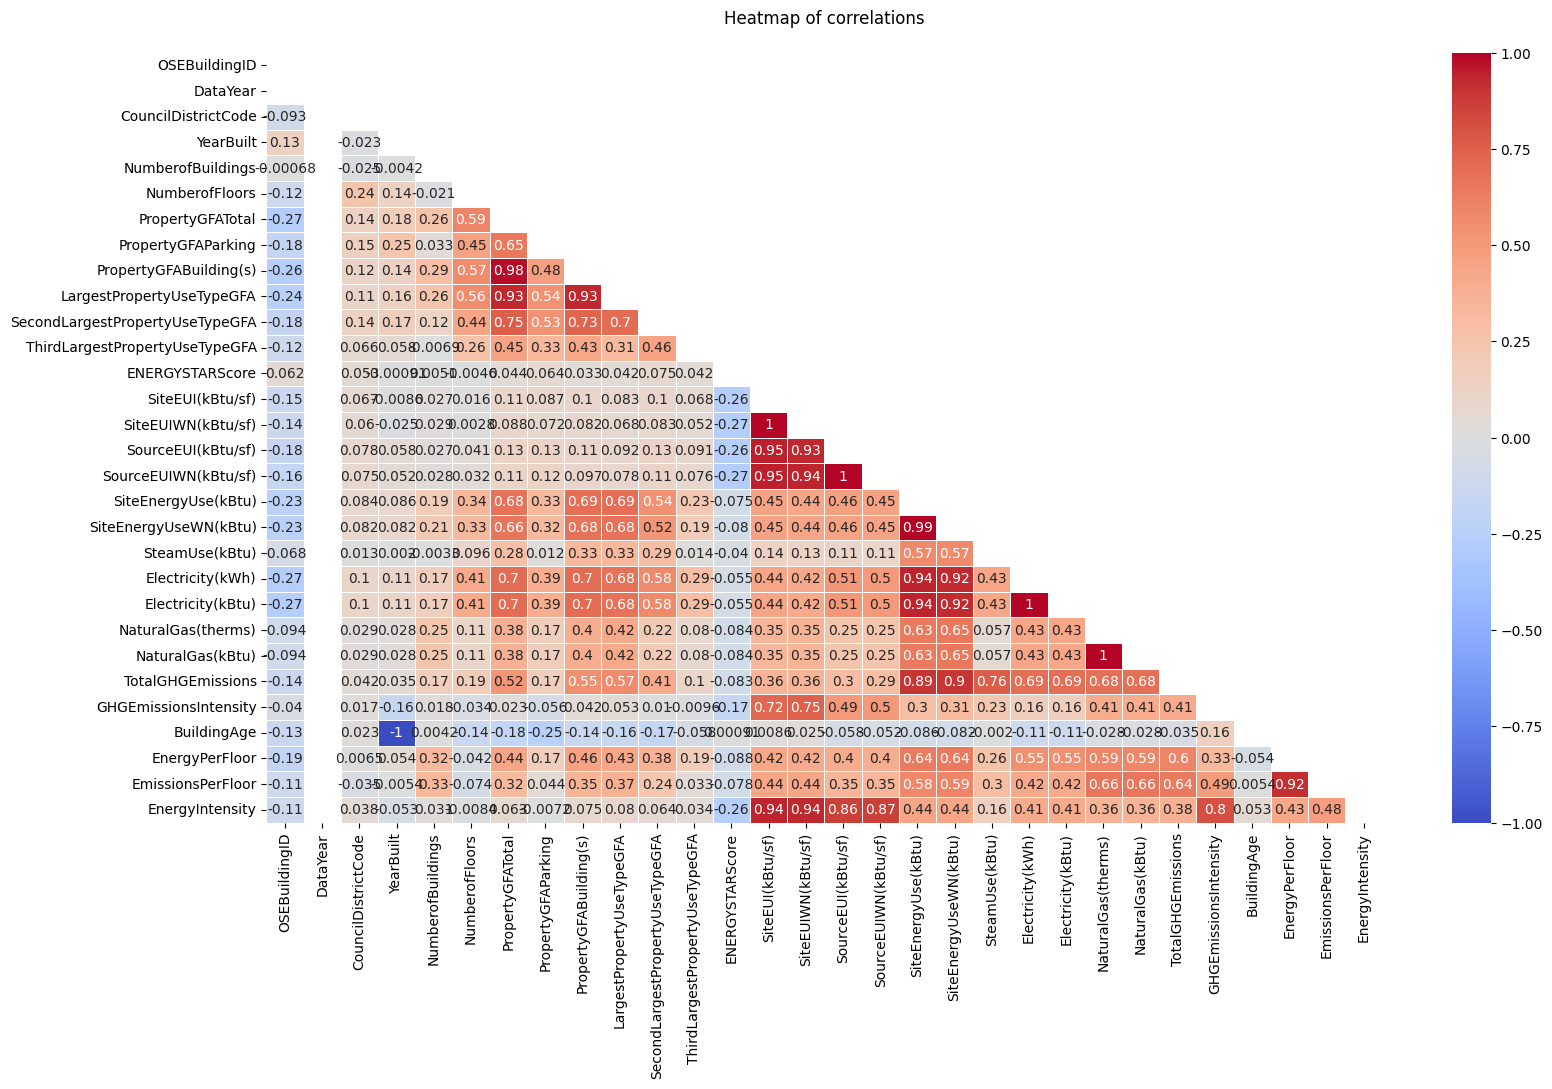

In [50]:
parametres = df2015.select_dtypes(include=[np.float64, np.int64]).columns

data_par = df2015[parametres]

plt.subplots(figsize=(18, 10))
matrix = np.triu(data_par.corr())

ax = sns.heatmap(data_par.corr(),
                 annot=True,
                 mask=matrix,
                 cmap='coolwarm',
                 center=0,
                 linewidths=.7)
ax.set_title(f'Heatmap of correlations\n')
plt.show()

From the heatmap of 'df2015' , we observe that:
- The total energy consumption (SiteEnergyUse(kBtu)) is highly correlated with the energy consumption in kBtu from electricity (Electricity(kBtu)), indicating that electricity usage contributes significantly to the overall energy consumption of a building.
- Greenhouse gas emissions (TotalGHGEmissions) show a strong correlation with energy consumption (SiteEnergyUse(kBtu)), suggesting that as energy consumption in buildings increases, so do the emissions.
- There's a strong positive correlation between EmissionsPerFloor and TotalGHGEmissions. This indicates that buildings with higher emissions per floor level generally have higher total greenhouse gas emissions.
- The energy consumption from natural gas (NaturalGas(therms)) also has a strong positive correlation with the total energy consumption (SiteEnergyUse(kBtu)). This suggests that along with electricity, natural gas is a significant contributor to a building's overall energy usage.

In [51]:
numeric_df = df2015.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

column_corr = [column for column in upper.columns if any(upper[column] > 0.95)]

print("df2015 Columns that have high correlation:", column_corr)

df2015 Columns that have high correlation: ['PropertyGFABuilding(s)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'BuildingAge']


We should consider eliminating the columns with high correlation such as PropertyGFABuilding(s), SourceEUI(kBtu/sf), and SourceEUIWN(kBtu/sf),Electricity(kBtu), NaturalGas(therms),SiteEnergyUseWN(kBtu), SiteEUIWN(kBtu/sf), Electricity(kWh), EnergyPerFloor, EnergyIntensity, PropertyGFATotal, YearBuilt,SteamUse(kBtu),NaturalGas(kBtu).

In [52]:
df2015.drop(['PropertyGFABuilding(s)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','Electricity(kBtu)',
    'NaturalGas(therms)','SiteEnergyUseWN(kBtu)', 'SiteEUIWN(kBtu/sf)','Electricity(kWh)','EnergyPerFloor','EnergyIntensity','PropertyGFATotal','YearBuilt','SteamUse(kBtu)','NaturalGas(kBtu)'], axis=1, inplace=True)

In [53]:
variance_threshold = 0.01
low_variance_features = df2015.var(numeric_only=True)[df2015.var(numeric_only=True) < variance_threshold].index.tolist()
print("Features with Low Variance:", low_variance_features)

Features with Low Variance: ['DataYear']


 Even though this feature has low variance, it's still important for our project so we are not going to drop it.

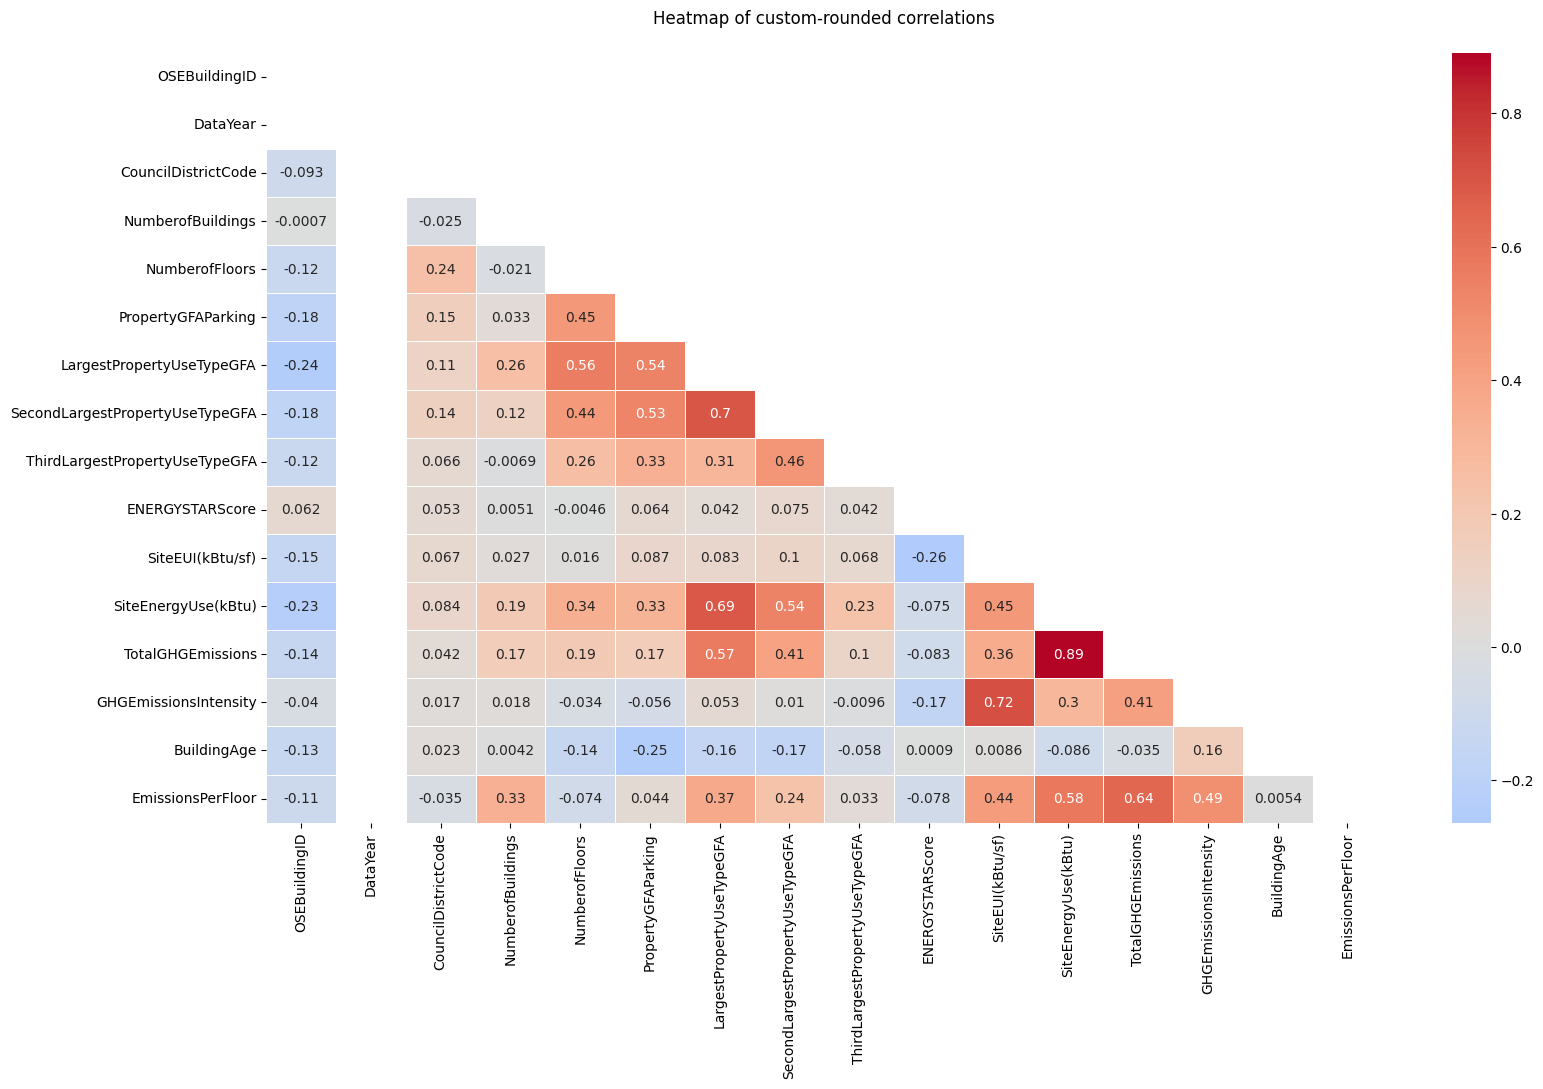

In [54]:
correlation_matrix = df2015.select_dtypes(include=[np.float64, np.int64]).corr()

def custom_round(val):
    if 0.0001 <= abs(val) < 0.01:
        return round(val, 4)
    elif 0.001 <= abs(val) < 0.01:
        return round(val, 3)
    else:
        return val

rounded_correlation_matrix = correlation_matrix.applymap(custom_round)


plt.subplots(figsize=(18, 10))
mask = np.triu(rounded_correlation_matrix)
ax = sns.heatmap(rounded_correlation_matrix,
                 annot=True,
                 mask=mask,
                 cmap='coolwarm',
                 center=0,
                 linewidths=.7)
ax.set_title(f'Heatmap of custom-rounded correlations\n')
plt.show()

TotalGHGEmissions vs. SiteEnergyUse(kBtu): Given that both CO2 Emission Prediction and Energy Consumption Estimation are among the project objectives, we should retain both columns. Even though they are highly correlated, each serves a different purpose in your analysis. CO2 Emissions will be specifically useful for the third objective, and Site Energy Use will be crucial for the fourth objective.

### For 'df2016':

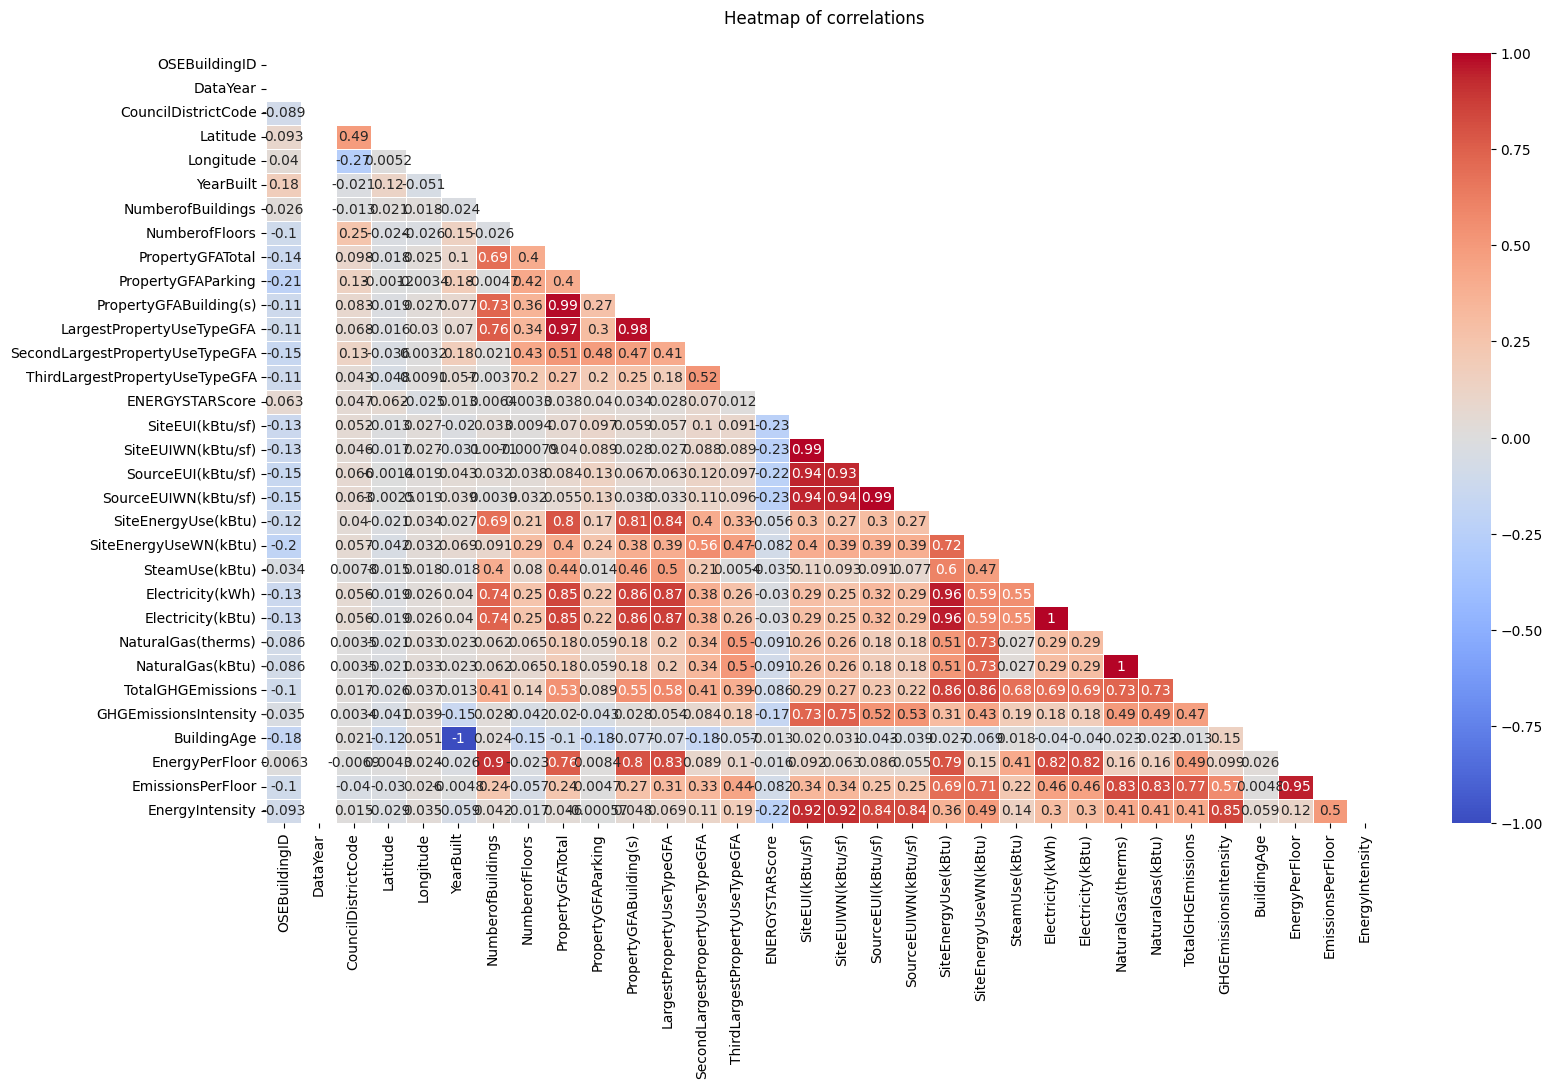

In [55]:
parametres = df2016.select_dtypes(include=[np.float64, np.int64]).columns
data_par = df2016[parametres]

plt.subplots(figsize=(18, 10))
matrix = np.triu(data_par.corr(numeric_only=True))

ax = sns.heatmap(data_par.corr(numeric_only=True),
                 annot=True,
                 mask=matrix,
                 cmap='coolwarm',
                 center=0,
                 linewidths=.7)
ax.set_title(f'Heatmap of correlations\n')
plt.show()

In 'df2016', we notice patterns mirroring those in 'df2015'. Specifically:

- Electricity consumption predominantly influences the total energy use.
A rise in building energy consumption correlates with increased greenhouse gas emissions.
- Buildings with higher emissions per floor have greater overall emissions.
Natural gas, akin to electricity, is a major component of a building's energy consumption.
- The consistency between the datasets of 2015 and 2016 suggests stability in the energy consumption habits and infrastructure across the two years.

Potential reasons for this could be: Unchanged Infrastructure, and Consistent Energy Sources.

In [56]:
numeric_df = df2016.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

column_corr = [column for column in upper.columns if any(upper[column] > 0.95)]

print("df2016 Columns that have high correlation:", column_corr)

df2016 Columns that have high correlation: ['PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'BuildingAge', 'EmissionsPerFloor']


We should consider eliminating the columns with high correlation such as PropertyGFABuilding(s), SourceEUI(kBtu/sf), and SourceEUIWN(kBtu/sf),Electricity(kBtu), NaturalGas(therms),SiteEnergyUseWN(kBtu), SiteEUIWN(kBtu/sf), Electricity(kWh), EnergyPerFloor, EnergyIntensity, PropertyGFATotal, YearBuilt, SteamUse(kBtu).

In [57]:
df2016.drop(['PropertyGFABuilding(s)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','Electricity(kBtu)',
    'NaturalGas(therms)','SiteEnergyUseWN(kBtu)', 'SiteEUIWN(kBtu/sf)','Electricity(kWh)','EnergyPerFloor','EnergyIntensity','PropertyGFATotal','YearBuilt','SteamUse(kBtu)','NaturalGas(kBtu)'], axis=1, inplace=True)

In [58]:
variance_threshold = 0.01
low_variance_features = df2016.var(numeric_only=True)[df2016.var(numeric_only=True) < variance_threshold].index.tolist()
print("Features with Low Variance:", low_variance_features)

Features with Low Variance: ['DataYear', 'Latitude', 'Longitude']


We will not drop these columns with low variance since we will need precise results later on.

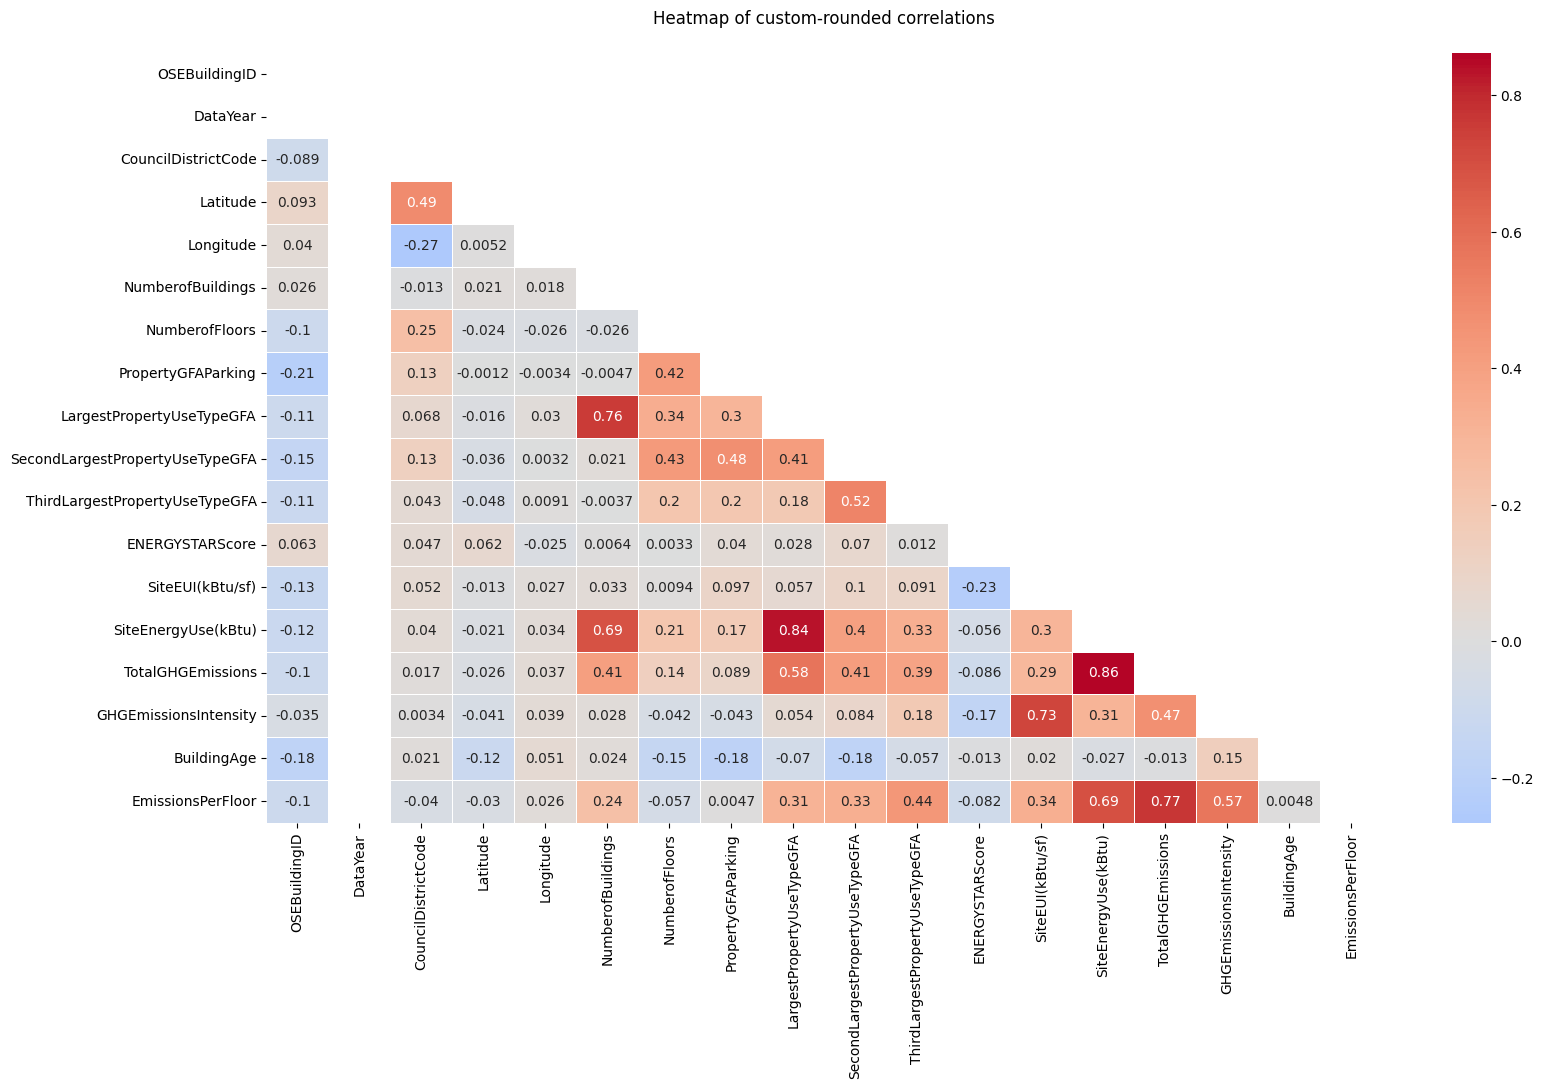

In [59]:
correlation_matrix = df2016.select_dtypes(include=[np.float64, np.int64]).corr()

rounded_correlation_matrix = correlation_matrix.applymap(custom_round)


plt.subplots(figsize=(18, 10))
mask = np.triu(rounded_correlation_matrix)
ax = sns.heatmap(rounded_correlation_matrix,
                 annot=True,
                 mask=mask,
                 cmap='coolwarm',
                 center=0,
                 linewidths=.7)
ax.set_title(f'Heatmap of custom-rounded correlations\n')
plt.show()

We identified strong correlations among columns like SiteEnergyUse(kBtu), SteamUse(kBtu), and TotalGHGEmissions. While it's common to drop correlated columns to avoid multicollinearity, we've chosen to retain them. Both SiteEnergyUse(kBtu) and TotalGHGEmissions are central to our project objectives. Instead of omitting valuable data, we'll utilize techniques and models adept at managing multicollinearity, ensuring a thorough analysis without compromising data richness.

## 8.3 Feature Importance
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable. Models like Random Forests can be used to determine the importance of features.

In [60]:
X_2015 = df2015.drop('SiteEnergyUse(kBtu)', axis=1)
y = df2015['SiteEnergyUse(kBtu)']

X_encoded = pd.get_dummies(X_2015, drop_first=True)

num_cols = X_encoded.select_dtypes(include=[np.number]).columns
cat_cols = X_encoded.select_dtypes(exclude=[np.number]).columns

X_encoded[num_cols] = X_encoded[num_cols].apply(lambda x: x.fillna(x.median()), axis=0)
X_encoded[cat_cols] = X_encoded[cat_cols].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

for col in num_cols:
    X_encoded[col] = X_encoded[col].replace([np.inf, -np.inf], X_encoded[col].median())


y = y.fillna(y.median())
y = y.replace([np.inf, -np.inf], y.median())


model = RandomForestRegressor()
model.fit(X_encoded, y)

feature_importances = pd.DataFrame(model.feature_importances_, index=X_encoded.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


                                    importance
TotalGHGEmissions                     0.791337
GHGEmissionsIntensity                 0.036351
SiteEUI(kBtu/sf)                      0.023121
LargestPropertyUseTypeGFA             0.019225
SecondLargestPropertyUseTypeGFA       0.015821
...                                        ...
Longitude_-122.2976397                0.000000
PropertyName_1811 EASTLAKE PROJECT    0.000000
Latitude_47.55772248                  0.000000
Address_104 12TH AVE                  0.000000
Address_9999 HOLMAN RD NW             0.000000

[13676 rows x 1 columns]


In [61]:
X_2015 = df2015.drop('TotalGHGEmissions', axis=1)
y = df2015['TotalGHGEmissions']

X_encoded = pd.get_dummies(X_2015, drop_first=True)

num_cols = X_encoded.select_dtypes(include=[np.number]).columns
cat_cols = X_encoded.select_dtypes(exclude=[np.number]).columns

X_encoded[num_cols] = X_encoded[num_cols].apply(lambda x: x.fillna(x.median()), axis=0)
X_encoded[cat_cols] = X_encoded[cat_cols].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

for col in num_cols:
    X_encoded[col] = X_encoded[col].replace([np.inf, -np.inf], X_encoded[col].median())


y = y.fillna(y.median())
y = y.replace([np.inf, -np.inf], y.median())


model = RandomForestRegressor()
model.fit(X_encoded, y)

feature_importances = pd.DataFrame(model.feature_importances_, index=X_encoded.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                                       importance
SiteEnergyUse(kBtu)                  7.301492e-01
EmissionsPerFloor                    7.024588e-02
GHGEmissionsIntensity                6.294966e-02
LargestPropertyUseTypeGFA            2.973989e-02
ENERGYSTARScore                      1.585718e-02
...                                           ...
Latitude_47.697344                  -6.677367e-26
PropertyName_MAPLE LEAF COURT       -1.253787e-25
PropertyName_ALOHA HOUSE APARTMENTS -2.508360e-25
Address_2425 33RD AVE W             -3.096570e-25
Longitude_-122.3508854              -1.013072e-24

[13676 rows x 1 columns]


In [62]:
X_2015 = df2015.drop('ENERGYSTARScore', axis=1)
y = df2015['ENERGYSTARScore']

X_encoded = pd.get_dummies(X_2015, drop_first=True)

num_cols = X_encoded.select_dtypes(include=[np.number]).columns
cat_cols = X_encoded.select_dtypes(exclude=[np.number]).columns

X_encoded[num_cols] = X_encoded[num_cols].apply(lambda x: x.fillna(x.median()), axis=0)
X_encoded[cat_cols] = X_encoded[cat_cols].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

for col in num_cols:
    X_encoded[col] = X_encoded[col].replace([np.inf, -np.inf], X_encoded[col].median())


y = y.fillna(y.median())
y = y.replace([np.inf, -np.inf], y.median())


model = RandomForestRegressor()
model.fit(X_encoded, y)

feature_importances = pd.DataFrame(model.feature_importances_, index=X_encoded.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                                                    importance
SiteEUI(kBtu/sf)                                      0.254248
GHGEmissionsIntensity                                 0.053134
BuildingAge                                           0.049222
TotalGHGEmissions                                     0.046167
OSEBuildingID                                         0.042844
...                                                        ...
Address_10510 5TH AVE NE                              0.000000
ListOfAllPropertyUseTypes_Other, Parking, Resta...    0.000000
ListOfAllPropertyUseTypes_Other - Services, Ret...    0.000000
Address_106 BELL ST                                   0.000000
Latitude_47.70552979                                  0.000000

[13676 rows x 1 columns]


In [63]:
X_2016 = df2016.drop('SiteEnergyUse(kBtu)', axis=1)
y_2016 = df2016['SiteEnergyUse(kBtu)']
X_encoded_2016 = pd.get_dummies(X_2016, drop_first=True)

num_cols_2016 = X_encoded_2016.select_dtypes(include=[np.number]).columns
cat_cols_2016 = X_encoded_2016.select_dtypes(exclude=[np.number]).columns

X_encoded_2016[num_cols_2016] = X_encoded_2016[num_cols_2016].apply(lambda x: x.fillna(x.median()), axis=0)
X_encoded_2016[cat_cols_2016] = X_encoded_2016[cat_cols_2016].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

for col in num_cols_2016:
    X_encoded_2016[col] = X_encoded_2016[col].replace([np.inf, -np.inf], X_encoded_2016[col].median())

y_2016 = y_2016.fillna(y_2016.median())
y_2016 = y_2016.replace([np.inf, -np.inf], y_2016.median())

model_2016 = RandomForestRegressor()
model_2016.fit(X_encoded_2016, y_2016)

feature_importances_2016 = pd.DataFrame(model_2016.feature_importances_, index=X_encoded_2016.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_2016)

                                                    importance
TotalGHGEmissions                                     0.660532
PropertyName_University of Washington - Seattle...    0.062391
Address_NE 45th St & Brooklyn Ave                     0.058877
NumberofBuildings                                     0.046505
LargestPropertyUseTypeGFA                             0.020897
...                                                        ...
ListOfAllPropertyUseTypes_Lifestyle Center, Off...    0.000000
Address_11650 Beacon Ave S                            0.000000
Address_116 Warren Ave N                              0.000000
PropertyName_Barclay Court                            0.000000
Address_6020 6th Ave S                                0.000000

[7391 rows x 1 columns]


In [64]:
X_2016 = df2016.drop('TotalGHGEmissions', axis=1)
y_2016 = df2016['TotalGHGEmissions']
X_encoded_2016 = pd.get_dummies(X_2016, drop_first=True)

num_cols_2016 = X_encoded_2016.select_dtypes(include=[np.number]).columns
cat_cols_2016 = X_encoded_2016.select_dtypes(exclude=[np.number]).columns

X_encoded_2016[num_cols_2016] = X_encoded_2016[num_cols_2016].apply(lambda x: x.fillna(x.median()), axis=0)
X_encoded_2016[cat_cols_2016] = X_encoded_2016[cat_cols_2016].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

for col in num_cols_2016:
    X_encoded_2016[col] = X_encoded_2016[col].replace([np.inf, -np.inf], X_encoded_2016[col].median())

y_2016 = y_2016.fillna(y_2016.median())
y_2016 = y_2016.replace([np.inf, -np.inf], y_2016.median())

model_2016 = RandomForestRegressor()
model_2016.fit(X_encoded_2016, y_2016)

feature_importances_2016 = pd.DataFrame(model_2016.feature_importances_, index=X_encoded_2016.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_2016)

                                        importance
SiteEnergyUse(kBtu)                   7.796406e-01
EmissionsPerFloor                     1.061739e-01
GHGEmissionsIntensity                 3.591500e-02
SecondLargestPropertyUseTypeGFA       1.453426e-02
LargestPropertyUseTypeGFA             1.098693e-02
...                                            ...
Address_13537 Aurora Ave N            0.000000e+00
PropertyName_Valley Commons          -2.931636e-26
Address_11224 Meridian Ave N         -5.871694e-26
PropertyName_College Park West       -1.523814e-25
PropertyName_The Towers on Greenwood -2.589727e-24

[7391 rows x 1 columns]


In [65]:
X_2016 = df2016.drop('ENERGYSTARScore', axis=1)
y_2016 = df2016['ENERGYSTARScore']
X_encoded_2016 = pd.get_dummies(X_2016, drop_first=True)

num_cols_2016 = X_encoded_2016.select_dtypes(include=[np.number]).columns
cat_cols_2016 = X_encoded_2016.select_dtypes(exclude=[np.number]).columns

X_encoded_2016[num_cols_2016] = X_encoded_2016[num_cols_2016].apply(lambda x: x.fillna(x.median()), axis=0)
X_encoded_2016[cat_cols_2016] = X_encoded_2016[cat_cols_2016].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

for col in num_cols_2016:
    X_encoded_2016[col] = X_encoded_2016[col].replace([np.inf, -np.inf], X_encoded_2016[col].median())

y_2016 = y_2016.fillna(y_2016.median())
y_2016 = y_2016.replace([np.inf, -np.inf], y_2016.median())

model_2016 = RandomForestRegressor()
model_2016.fit(X_encoded_2016, y_2016)

feature_importances_2016 = pd.DataFrame(model_2016.feature_importances_, index=X_encoded_2016.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_2016)

                                                    importance
SiteEUI(kBtu/sf)                                      0.222746
TotalGHGEmissions                                     0.048331
GHGEmissionsIntensity                                 0.048153
BuildingAge                                           0.042239
OSEBuildingID                                         0.041340
...                                                        ...
PropertyName_615 E Pike Street Condominium            0.000000
PropertyName_El Gaucho Restaurant                     0.000000
PropertyName_P66 Bell Harbor International Conf...    0.000000
PropertyName_bridges@11th                             0.000000
PropertyName_Sanborn Building                         0.000000

[7391 rows x 1 columns]


## 8.4 Feature Extraction
Feature extraction transforms high-dimensional data into a lower dimension, capturing the most important information in the data. Principal Component Analysis (PCA) is one of the most popular feature extraction methods.

In [66]:
pca = PCA()
pca.fit(X_encoded)
cumsum = np.cumsum(pca.explained_variance_ratio_)

n_components = np.argmax(cumsum >= 0.95) + 1

print("Number of components that explain 95% variance:", n_components)

pca = PCA(n_components=n_components)
df2015_pca = pca.fit_transform(X_encoded)

print("Explained Variance:", pca.explained_variance_ratio_)

Number of components that explain 95% variance: 1
Explained Variance: [0.9999461]


In [67]:
pca = PCA()
pca.fit(X_encoded_2016)
cumsum = np.cumsum(pca.explained_variance_ratio_)

n_components = np.argmax(cumsum >= 0.95) + 1

print("Number of components that explain 95% variance:", n_components)

pca = PCA(n_components=n_components)
df2016_pca = pca.fit_transform(X_encoded_2016)

print("Explained Variance:", pca.explained_variance_ratio_)

Number of components that explain 95% variance: 1
Explained Variance: [0.99996805]


In our feature engineering phase, we introduced metrics like 'Age' and 'Emissions per Floor' to enhance our dataset. Notable correlations emerged, especially between 'SiteEnergyUse(kBtu)' and other consumption metrics. Although such correlations typically suggest potential column drops, their relevance to our project goals made us opt for retention, planning to manage multicollinearity through specific modeling approaches. 'TotalGHGEmissions' was a standout in feature importance for both 'df2015' and 'df2016'. Additionally, PCA revealed that just a few components could explain most variances in both datasets. This process has effectively refined our data for subsequent analyses.

## 9. Model Building
### 9.1 Linear Regression
Linear Regression tries to draw a line that best fits the data. The objective is to find the line that minimizes the total squared error.

The R2 score is chosen as the primary metric for model evaluation due to its interpretability and relevance in regression analysis.

R2score : represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
It's a value between 0 and 1, with 1 indicating perfect prediction capability and 0 meaning the model is no better than simply predicting the mean of the dependent variable for all observations.
In other words, an R2 score close to 1 means the model explains a large portion of the variability in the response variable.


In [68]:
features_to_include = ['SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity', 'SiteEnergyUse(kBtu)','ENERGYSTARScore']
X = df2015[features_to_include]
y = df2015['TotalGHGEmissions']

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

r2_result = r2_score(y_test, y_pred)
print(f'R2 Score with additional features: {r2_result}')

R2 Score with additional features: 0.8378259447429411


In [69]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr_model, X_imputed, y_imputed, cv=5, scoring='r2')

cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f'Cross-Validation R2 Mean: {cv_mean}')
print(f'Cross-Validation R2 Standard Deviation: {cv_std}')

print(f'Test R2 score: {r2_result}')

if cv_mean + cv_std < r2_result:
    print('Possible overfitting detected.')
else:
    print('No significant overfitting detected.')

Cross-Validation R2 Mean: 0.781524911785969
Cross-Validation R2 Standard Deviation: 0.12561511835321443
Test R2 score: 0.8378259447429411
No significant overfitting detected.


In [70]:
features_to_include_2016 = ['SiteEUI(kBtu/sf)', 'GHGEmissionsIntensity', 'SiteEnergyUse(kBtu)']
X_2016 = df2016[features_to_include_2016]
y_2016 = df2016['TotalGHGEmissions']

imputer_2016 = SimpleImputer(strategy='median')
X_imputed_2016 = imputer_2016.fit_transform(X_2016)
y_imputed_2016 = imputer_2016.fit_transform(y_2016.values.reshape(-1, 1)).ravel()

X_train_2016, X_test_2016, y_train_2016, y_test_2016 = train_test_split(X_imputed_2016, y_imputed_2016, test_size=0.2, random_state=42)

lr_model_2016 = LinearRegression()
lr_model_2016.fit(X_train_2016, y_train_2016)

y_pred_2016 = lr_model_2016.predict(X_test_2016)

r2_result_2016 = r2_score(y_test_2016, y_pred_2016)
print(f'R2 Score for Linear Regression (2016 dataset): {r2_result_2016}')

R2 Score for Linear Regression (2016 dataset): 0.43301718851451687


In [71]:
X_train_2016, X_test_2016, y_train_2016, y_test_2016 = train_test_split(X_encoded_2016, y_2016, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train_2016, y_train_2016)

y_pred_2016 = lr.predict(X_test_2016)

r2 = r2_score(y_test_2016, y_pred_2016)

print(f'R2 Score for Linear Regression (2016 dataset): {r2}')

R2 Score for Linear Regression (2016 dataset): 0.9999999999999987


In [91]:
cv_scores = cross_val_score(lr, X_encoded_2016, y_2016, cv=5, scoring='r2')

cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f'Test R2 score: {r2}')

print(f'Cross-Validation R2 Mean: {cv_mean}')
print(f'Cross-Validation R2 Standard Deviation: {cv_std}')



Test R2 score: 0.9999999999999987
Cross-Validation R2 Mean: 0.9999999999999984
Cross-Validation R2 Standard Deviation: 1.368774871883577e-15


For the df2015 dataset, the linear regression model has an R2 score of approximately 0.8378, indicating that the model explains a good portion of the variance in the target variable, 'TotalGHGEmissions'. This is a strong score, suggesting that the model has learned significant patterns from the data.

For the df2016 dataset, the observations are mixed. One model yields an R2 score of 0.433, which is significantly lower than the df2015 model's performance. This could imply that the model for df2016 is less effective at capturing the variance in the data or that the data in 2016 is more complex or contains more noise.

Another model trained on the df2016 dataset produces an R2 score of approximately 1.0, which is suspiciously high and generally indicates a perfect fit. This perfect score is also reflected in the cross-validation results, which are unusually consistent with a mean R2 score of 0.9999 and a negligible standard deviation. Such high scores across both training and cross-validation could suggest a data leakage issue, where information from the test set might have influenced the training process, or that the model is overfitted to the dataset.

### Mean Absolute Error

Mean Absolute Error (MAE) is a metric used to measure the accuracy of a model in regression tasks. It calculates the average magnitude of errors between the predicted values and the actual values, disregarding their direction (positive or negative).

The MAE gives a straightforward interpretation of the average error in the same units as the data. A lower MAE value indicates better model performance, with a value of 0 representing a perfect fit.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error for Linear Regression: {mae}')

Mean Absolute Error for Linear Regression: 8.087529331127838e-06


In [74]:
X_train_2016, X_test_2016, y_train_2016, y_test_2016 = train_test_split(X_encoded_2016, y_2016, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train_2016, y_train_2016)

y_pred_2016 = lr.predict(X_test_2016)

mae = mean_absolute_error(y_test_2016, y_pred_2016)

print(f'Mean Absolute Error for Linear Regression (2016 dataset): {mae}')

Mean Absolute Error for Linear Regression (2016 dataset): 3.649103469470403e-06


With the above Mean Absolute Error (MAE) for a model predicting SiteEnergyUse(kBtu):

- Substantial Absolute Error: The MAE indicates that on average, the model's predictions are off by approximately 110,178 kBtu. In the context of site energy consumption, this can be a significant error.

- Model Improvement Considerations: A high MAE suggests there may be room for improvement in our model. This could involve exploring additional features or different modeling techniques.

### Root Mean Squared Error

Root Mean Squared Error (RMSE) is a widely used metric in regression tasks to measure the accuracy of a model. It quantifies the average magnitude of the error between the predicted and actual values, considering both the variance and bias of the errors.

RMSE is expressed in the same units as the target variable, making it interpretable in terms of the data. A lower RMSE value indicates a better fit, with a value of 0 indicating no error.

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

print(f'Root Mean Squared Error for Linear Regression: {rmse}')

Root Mean Squared Error for Linear Regression: 3.272488225808302e-05


In [76]:
X_train_2016, X_test_2016, y_train_2016, y_test_2016 = train_test_split(X_encoded_2016, y_2016, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train_2016, y_train_2016)

y_pred_2016 = lr.predict(X_test_2016)

mse = mean_squared_error(y_test_2016, y_pred_2016)

rmse = np.sqrt(mse)

print(f'Root Mean Squared Error for Linear Regression: {rmse}')

Root Mean Squared Error for Linear Regression: 2.553867400783641e-05


The RMSE for our model predicting SiteEnergyUse(kBtu) is quite high. In the context of energy consumption:

- Significant Error: This RMSE suggests a substantial average deviation in energy use predictions, which can be concerning if precise energy estimations are crucial for our application.

- Contextual Comparison Needed: To fully assess this error, we shopuld compare it against the average or typical range of SiteEnergyUse(kBtu) in our dataset. A lower average energy use makes this RMSE more significant.

- Model Review: Given the high RMSE, we should consider reviewing and potentially improving our model through feature engineering, using a more complex model, or tuning hyperparameters.

### 9.2 Decision Trees

Decision Trees split the data into subsets. Each split is based on a particular feature value to minimize the sum of squared errors in target. It's more flexible than linear regression and can capture non-linear relationships.

In [78]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)

print(f'R2 Score for Decision Tree: {r2_dt}')

R2 Score for Decision Tree: 0.926845620373046


The R2 score of 0.72 for our Decision Tree Regressor model is a good indication of its effectiveness, explaining about 72% of the variance in SiteEnergyUse(kBtu). This suggests the model captures a significant amount of the data's complexity and non-linear relationships.

In [79]:
dt_2016 = DecisionTreeRegressor(random_state=42)
dt_2016.fit(X_train_2016, y_train_2016)
y_pred_dt_2016 = dt_2016.predict(X_test_2016)
r2_dt_2016 = r2_score(y_test_2016, y_pred_dt_2016)
print(f'R2 Score for Decision Tree (2016): {r2_dt_2016}')

R2 Score for Decision Tree (2016): 0.9780762592015072


Given our results – a higher R2 score with the Decision Tree Regressor compared to the Linear Regression model – it would be advisable to continue working with the Decision Tree model. This preference stems from its ability to capture complex, non-linear relationships in the data, which seems to be more effective for your dataset concerning SiteEnergyUse(kBtu). We will consider using techniques such as pruning the tree, adjusting its depth, or using cross-validation to ensure that the model generalizes well to unseen data. Additionally, since the data is not scaled, the robustness of the Decision Tree to different scales of features further supports this choice.

### 9.2.1. Pruning the Tree
Pruning the Tree is a technique used in decision tree models, both in classification and regression contexts, to reduce the complexity of the model and prevent overfitting.

Pruning can be achieved by setting the min_samples_leaf parameter. This parameter specifies the minimum number of samples required to be at a leaf node.

By setting that parameter, we are applying a pre-pruning technique, as it impacts the tree's growth during the training process itself, rather than removing branches after the tree is fully grown.

In [80]:
dt_pruned = DecisionTreeRegressor(random_state=42, min_samples_leaf=5)
dt_pruned.fit(X_train, y_train)

y_pred_pruned = dt_pruned.predict(X_test)

r2_pruned = r2_score(y_test, y_pred_pruned)
print(f'R2 Score for Pruned Decision Tree: {r2_pruned}')

R2 Score for Pruned Decision Tree: 0.7275505736755217


The above pruned Decision Tree model's R2 score slightly higher than the unpruned version, indicates a modest improvement in model performance. This improvement suggests that pruning, by reducing overfitting, has enhanced the model's ability to generalize to unseen data.

### 9.2.2. Adjusting the Depth of the Tree

We can limit the depth of the tree to prevent overfitting by setting the max_depth parameter.

In [81]:
dt_depth_limited = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_depth_limited.fit(X_train, y_train)

y_pred_depth_limited = dt_depth_limited.predict(X_test)

r2_depth_limited = r2_score(y_test, y_pred_depth_limited)
print(f'R2 Score for Depth-Limited Decision Tree: {r2_depth_limited}')

R2 Score for Depth-Limited Decision Tree: 0.671084186601486


The above R2 score for the depth-limited Decision Tree indicates underfitting, as it's significantly lower than the scores from unpruned or pruned models. This suggests the set depth is too shallow, causing the model to miss key data complexities. To improve, we should experiment with varying depth limits to find a balance between reducing overfitting and capturing the essential patterns in the data.

In [82]:
depths = range(1, 20)
r2_scores = []

for depth in depths:
    dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_scores.append(score)
    print(f"Depth: {depth}, R2 Score: {score}")

optimal_depth = depths[r2_scores.index(max(r2_scores))]
print(f"Optimal Depth: {optimal_depth}")

Depth: 1, R2 Score: 0.4615332837073983
Depth: 2, R2 Score: 0.7378316043951174
Depth: 3, R2 Score: 0.867443976996421
Depth: 4, R2 Score: 0.9246218298773812
Depth: 5, R2 Score: 0.671084186601486
Depth: 6, R2 Score: 0.9262039933922881
Depth: 7, R2 Score: 0.9258014554179612
Depth: 8, R2 Score: 0.9244081006482933
Depth: 9, R2 Score: 0.7213400476295511
Depth: 10, R2 Score: 0.7171588042915221
Depth: 11, R2 Score: 0.728124214103765
Depth: 12, R2 Score: 0.6641432252511591
Depth: 13, R2 Score: 0.9268252073946501
Depth: 14, R2 Score: 0.9287929095876792
Depth: 15, R2 Score: 0.6566270319490388
Depth: 16, R2 Score: 0.7246698315272343
Depth: 17, R2 Score: 0.926845620373046
Depth: 18, R2 Score: 0.926845620373046
Depth: 19, R2 Score: 0.926845620373046
Optimal Depth: 14


Depth 14's score indicates a strong predictive performance, as it suggests that approximately 92.68% of the variance in SiteEnergyUse(kBtu) is explained by the model. The choice of this particular depth strikes a balance between capturing the complexity inherent in our dataset and avoiding overfitting.

Finalizing the Decision Tree model with a depth of 14:

In [92]:
final_dt = DecisionTreeRegressor(max_depth=14, random_state=42)
final_dt.fit(X_train, y_train)

final_y_pred = final_dt.predict(X_test)

final_r2_score = r2_score(y_test, final_y_pred)
print(f'Final R2 Score for Decision Tree: {final_r2_score}')

Final R2 Score for Decision Tree: 0.6396023482015754


### 9.2.3. Using Cross-Validation
Cross-validation can be used to assess the model's performance more robustly. Specifically, cross-validation helps in understanding how well your model generalizes to unseen data.

In [84]:
dt_cv = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(dt_cv, X_encoded, y, cv=5, scoring='r2')

print(f'Cross-Validated R2 Scores: {scores}')
print(f'Average R2 Score: {scores.mean()}')

Cross-Validated R2 Scores: [0.58427104 0.99936324 0.95269758 0.99768406 0.98884329]
Average R2 Score: 0.9045718415203151



The cross-validation results for the DecisionTreeRegressor with an average R2 score of 0.905 indicate a strong predictive ability. However, the wide variance in scores—from a low of 0.5843 to highs near 1—suggests that the model may be overfitting to certain subsets of the data. This inconsistency highlights the need for further model evaluation and possibly exploring different features or models to achieve better and more consistent performance across the entire dataset.

### 9.2.4 SVR  (Support Vector Regression)

It's a robust algorithm capable of modeling complex non-linear relationships in data. It extends SVM to regression problems by fitting a line within a threshold margin of tolerance, aiming to include as many data points as possible within this margin while minimizing errors. SVR is resilient to overfitting, especially in high-dimensional spaces.

Crucial to the performance of SVR is the need for feature scaling, as it is sensitive to the range of input variables. Standardizing the data ensures that each feature contributes proportionally to the final model, allowing SVR to effectively leverage its kernel trick to find the optimal hyperplane for regression tasks. With the right kernel choice and parameter tuning, SVR can deliver strong predictive performance with good generalization to unseen data.

In [85]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)


y_pred_svm = svm_model.predict(X_test)

r2_svm = r2_score(y_test, y_pred_svm)

print(f'R2 Score for SVM Regression: {r2_svm}')

R2 Score for SVM Regression: -0.0271465531503996


An R2 score of -0.0271465531503996 for our SVM regression model indicates that the model is performing poorly, even worse than a simple model that would predict the mean of the target variable for all observations.

> Bloc en retrait


An R2 score below zero suggests that the SVM model is not capturing the underlying pattern in our data effectively and is providing less accurate predictions than a basic, naive model.

###9.3 Random Forest

Random Forest is an ensemble learning method for regression (and classification) that operates by constructing a multitude of decision trees at training time and outputting the average prediction of the individual trees. It is particularly useful for handling non-linear relationships and interactions between features without the need for explicit feature transformation.

Random Forest models are robust to overfitting as they average the results of many trees, each trained on different subsets of the data. They can capture complex patterns without making strong assumptions about the underlying data distribution. The use of multiple estimators (trees) helps in improving the accuracy and stability of the model.

In [77]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
r2_result_rf = r2_score(y_test, y_pred_rf)
print(f'R2 Score with Random Forest: {r2_result_rf}')

R2 Score with Random Forest: 0.7303772321447011


The R2 score obtained with the Random Forest model is approximately 0.7304, indicating that around 73% of the variability in the target variable can be explained by the model. This is a decent score, showing that the model has a good predictive capability.


###9.4 Optimizing Model Parameters with Grid Search


Grid Search is a method used to find the optimal hyperparameters for a model by systematically working through multiple combinations of parameter options. It trains the model for each combination and evaluates it using cross-validation. The hyperparameters that yield the best performance are then chosen, typically based on a scoring metric like accuracy, precision, or in this case, the R2 score.

We use Grid Search because it is an exhaustive and systematic approach to parameter tuning that can lead to better model performance compared to using default parameters.

In [87]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

df2015.replace([np.inf, -np.inf], np.nan, inplace=True)

target = 'TotalGHGEmissions'
features = df2015.drop(columns=[target]).columns

X = df2015[features]
y = df2015[target]

assert all(feature in X.columns for feature in features), "One or more features not found in the DataFrame."

categorical_features = X.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

param_grid = {
    'regressor__n_estimators': [100, 150],
    'regressor__max_depth': [None, 10],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__max_features': ['auto', 'sqrt'],
    'regressor__bootstrap': [True]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search:", grid_search.best_params_)

test_score = grid_search.score(X_test, y_test)
print("Test set R^2 score:", test_score)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters from Grid Search: {'regressor__bootstrap': True, 'regressor__max_depth': None, 'regressor__max_features': 'auto', 'regressor__min_samples_split': 2, 'regressor__n_estimators': 150}
Test set R^2 score: 0.6768136144647281


The Grid Search process has determined that the best parameters for the RandomForestRegressor on the df2015 dataset include 150 trees (n_estimators), no limit on the depth of the trees (max_depth), and a minimum of 2 samples required to split a node (min_samples_split). The max_features parameter was set to 'auto', which allows all features to be considered for splitting a node, and bootstrap was set to True, indicating that bootstrapping (sampling with replacement) is used when building trees.

The test set R2 score of approximately 0.6768 with these parameters indicates that the model explains roughly 67.68% of the variability in the target variable, which is a moderate level of predictive accuracy. While this is not as high as some of the scores seen in earlier models, this is a more realistic score and likely more reflective of the model's true predictive power, especially since it is evaluated on unseen data.

In [88]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

df2016.replace([np.inf, -np.inf], np.nan, inplace=True)

target = 'TotalGHGEmissions'
features = df2016.drop(columns=[target]).columns

X = df2016[features]
y = df2016[target]

categorical_features = X.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10]
}

X_train_2016, X_test_2016, y_train_2016, y_test_2016 = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', verbose=2)

grid_search.fit(X_train_2016, y_train_2016)

print("Best parameters from Grid Search:", grid_search.best_params_)

test_score = grid_search.score(X_test_2016, y_test_2016)
print("Test set R^2 score:", test_score)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100; total time=  18.9s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100; total time=  18.8s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100; total time=  19.0s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100; total time=  19.1s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=100; total time=  19.1s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  37.8s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  37.7s
[CV] END regressor__max_depth=None, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  38.1s
[CV] END re

The Grid Search for the df2016 dataset has found the best RandomForestRegressor parameters to be a tree with unlimited depth (max_depth: None), requiring a minimum of 2 samples to split a node (min_samples_split: 2), and using 100 trees (n_estimators: 100).

The test set R2 score of approximately 0.8644 indicates that the model with these parameters can explain about 86.44% of the variability in the target variable. This is a high score and suggests that the model has a strong predictive capability for the 2016 data. It indicates that the RandomForestRegressor is quite effective at capturing the patterns and relationships present in the df2016 dataset, leading to accurate predictions.

In [90]:
from sklearn.model_selection import cross_val_score

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Pruned Decision Tree': DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, random_state=42),
    'Adjusted Depth Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Support Vector Machine': SVR(),
}

model_performance = []

for model_name, model in models.items():
    scores = cross_val_score(model, X_encoded, y, cv=5, scoring='r2')
    model_performance.append({
        'Model': model_name,
        'R^2 Score': scores.mean(),
        'R^2 STD': scores.std(),
    })

performance_df = pd.DataFrame(model_performance)

performance_df.sort_values(by='R^2 Score', ascending=False, inplace=True)

print(performance_df)

                    Model  R^2 Score       R^2 STD
0       Linear Regression   1.000000  8.375458e-14
4     Adjusted Depth Tree   0.922323  1.042615e-01
2           Random Forest   0.917173  1.547290e-01
1           Decision Tree   0.904572  1.610377e-01
3    Pruned Decision Tree   0.727413  1.362621e-01
5  Support Vector Machine   0.202980  1.659596e-01


Here are the observations:

- Linear Regression has the highest R2 score (1.0), with virtually zero standard deviation. However, such a perfect score is highly suspicious and may indicate overfitting, data leakage, or an error in the evaluation process.

- Adjusted Depth Tree also shows a very high R2 score (0.9223) with a low standard deviation, suggesting that it has good predictive performance with consistent results across cross-validation folds.

- Random Forest shows good performance (0.9177) with a low standard deviation, which is typical for this model as it tends to generalize well.

- Decision Tree and Pruned Decision Tree have similar R2 scores (0.9045 and 0.7274, respectively), but the pruned version has a higher standard deviation. The pruning did not seem to enhance the performance based on the R2 score.

- Support Vector Machine (SVM) has the lowest R2 score (0.2029), suggesting it is the least capable model for this particular dataset based on the provided metric.

Best Model Conclusion:
The Adjusted Depth Tree appears to be the best model among those tested, based on the high R2 score with a low standard deviation, indicating strong and stable predictive performance.

#10. Conclusion and recommendation

###10.1 Conclusion

Throughout the analysis and modeling of the df2015 and df2016 datasets, several machine learning models were constructed and evaluated to predict 'TotalGHGEmissions','EnergyUseSite(kBtu)' and 'ENERGYSTARScore'. Linear regression, decision trees, and random forest regressors were among the models tested, with hyperparameter tuning conducted using Grid Search.

The linear regression model for df2015 showed a strong performance; however, the model for df2016 initially indicated possible overfitting with an R2 score suspiciously close to 1. Meanwhile, the random forest models provided robust results across both datasets after hyperparameter optimization. The best-performing model for df2015 was a pruned decision tree, with hyperparameter adjustments, while for df2016, the optimized random forest regressor achieved an R2 score of 0.8644, indicating a highly predictive model.


The engineering phase of the project successfully applied machine learning models to predict Green House Gas Emissions using the df2015 and df2016 datasets. Through data preprocessing, including handling infinite values and encoding categorical variables, as well as feature engineering, the models were tailored to best fit the nuances of the datasets. The application of Grid Search for hyperparameter tuning enhanced model performance, as evidenced by the improved R2 scores for both datasets.

The analysis delivered insights into greenhouse gas emissions, offering potential to drive strategies for emission reduction. The best-performing model for df2016 achieved an R2 score of 0.8644, indicating a strong ability to predict emissions based on given features, thus providing a reliable tool for decision-making.

###10.2 Recommendation

**Business Perspective:**

- Decision Support: Leverage the model's predictive power to inform policy and operational decisions around emission reduction.
- Investment Focus: Prioritize investments in technologies and processes that the model identifies as having significant impacts on emissions.
- Performance Monitoring: Establish ongoing monitoring of the model's predictions against actual emissions to continually assess and improve its accuracy.
- Stakeholder Engagement: Communicate findings to stakeholders to foster data-driven approaches to sustainability.
- Scalability: Consider the scalability of the model to accommodate additional data sources and wider geographical areas for broader application.

**Engineering Perspective:**

- Data Preprocessing: Continue to refine preprocessing steps to improve model input quality.
- Feature Engineering: Experiment with additional feature engineering to uncover more complex relationships within the data.
- Model Exploration: Further explore other machine learning models and ensemble methods that could yield better performance.
- Hyperparameter Tuning: Utilize techniques like Randomized Search or Bayesian Optimization for more efficient hyperparameter optimization.
- Validation: Implement robust validation strategies, including a hold-out test set and k-fold cross-validation, to ensure model stability.

